In [ ]:
!pip install yfinance
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.2 MB/s eta 0:00:00


#CNN

## CNN 10 years

[*********************100%***********************]  1 of 1 completed


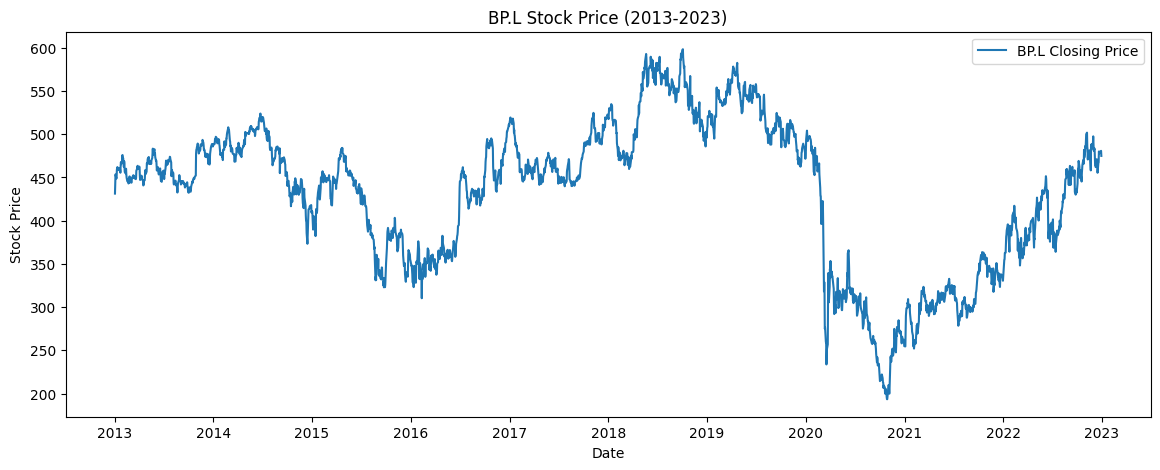

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for BP.L
df = yf.download('BP.L', start='2013-01-01', end='2023-01-01')

# Plot the historical closing price data
plt.figure(figsize=(14, 5))
plt.plot(df['Close'], label='BP.L Closing Price')
plt.title('BP.L Stock Price (2013-2023)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Prepare data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

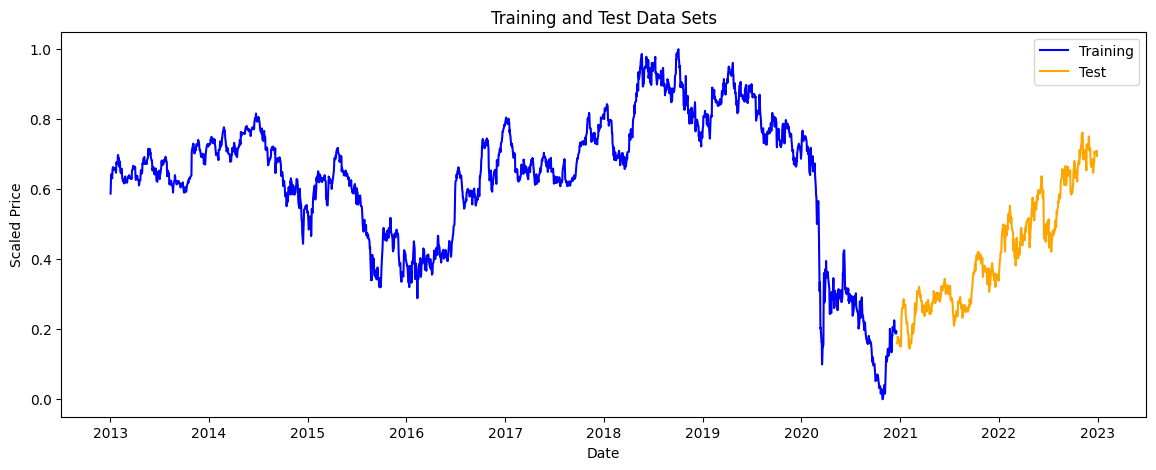

In [ ]:
# 80-20 split
q_80 = int(len(scaled_data) * 0.8)
q_20 = int(len(scaled_data) * 0.2)

# Split data into training and test sets using the new split
train_data = scaled_data[:q_80]  # 80% of the dataset for training
test_data = scaled_data[q_80:]  # Remaining 20% of the dataset for testing

# Plot the split data showing only training and test data
plt.figure(figsize=(14, 5))
plt.plot(df.index[:q_80], train_data, color='blue', label='Training')
plt.plot(df.index[q_80:], test_data, color='orange', label='Test')
plt.title('Training and Test Data Sets')
plt.xlabel('Date')
plt.ylabel('Scaled Price')
plt.legend()
plt.show()

In [ ]:
# min and max values for each dataset
print("Training Data - Min:", np.min(train_data), "Max:", np.max(train_data))
print("Test Data - Min:", np.min(test_data), "Max:", np.max(test_data))

Training Data - Min: 0.0 Max: 1.0
Test Data - Min: 0.14476609872782864 Max: 0.7616459924627925


In [ ]:
# Training Data
train_start_date = df.index[0]  # Starting date of the training set
train_end_date = df.index[q_80 - 1]  # Ending date of the training set

# Test Data
test_start_date = df.index[q_80]  # Starting date of the test set
test_end_date = df.index[-1]  # Ending date of the test set

# Print the start and end dates for each dataset
print("Training Data - Start Date:", train_start_date, ", End Date:", train_end_date)
print("Test Data - Start Date:", test_start_date, ", End Date:", test_end_date)

Training Data - Start Date: 2013-01-02 00:00:00 , End Date: 2020-12-18 00:00:00
Test Data - Start Date: 2020-12-21 00:00:00 , End Date: 2022-12-30 00:00:00


In [ ]:
# Create sequences
def create_sequences(data, seq_length):
  X, y = [], []
  for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(X), np.array(y)

seq_length = 7  # 7-day lag
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
# Reshape input for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Print the shapes of the datasets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (2010, 7, 1)
X_test shape: (498, 7, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import mean_squared_error

# Build CNN model
CNN_1 = Sequential(name='CNN_1')
CNN_1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
CNN_1.add(MaxPooling1D(pool_size=2))
CNN_1.add(MaxPooling1D(pool_size=1))
CNN_1.add(Flatten())
CNN_1.add(Dense(units=1))

# Compile and train the model
CNN_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mse'])

CNN_1.fit(X_train, y_train, epochs=50, batch_size=32)

CNN_1.summary()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3005 - mean_absolute_error: 0.4604 - mse: 0.3005
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044 - mean_absolute_error: 0.0490 - mse: 0.0044
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023 - mean_absolute_error: 0.0353 - mse: 0.0023
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 - mean_absolute_error: 0.0259 - mse: 0.0013
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - mean_absolute_error: 0.0263 - mse: 0.0014
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0013 - mean_absolute_error: 0.0256 - mse: 0.0013
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - mean_absolute_error: 0.0252 - mse: 0.0013
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014 - mean_absolute_error: 0.0259 - mse: 0.0014
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - mean_absolute_error: 0.0251 - mse: 0.0013
Epoch 10/50
63/63 ━━━━━━━━━━━━

Model: "CNN_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 5, 64)               │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,157 (4.52 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 772 (3.02 KB)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
RMSE: 11.023823949666406
MAE: 8.547211735124092
MSE: 121.52469447323864
Accuracy Percentage (R-squared): 96.99%


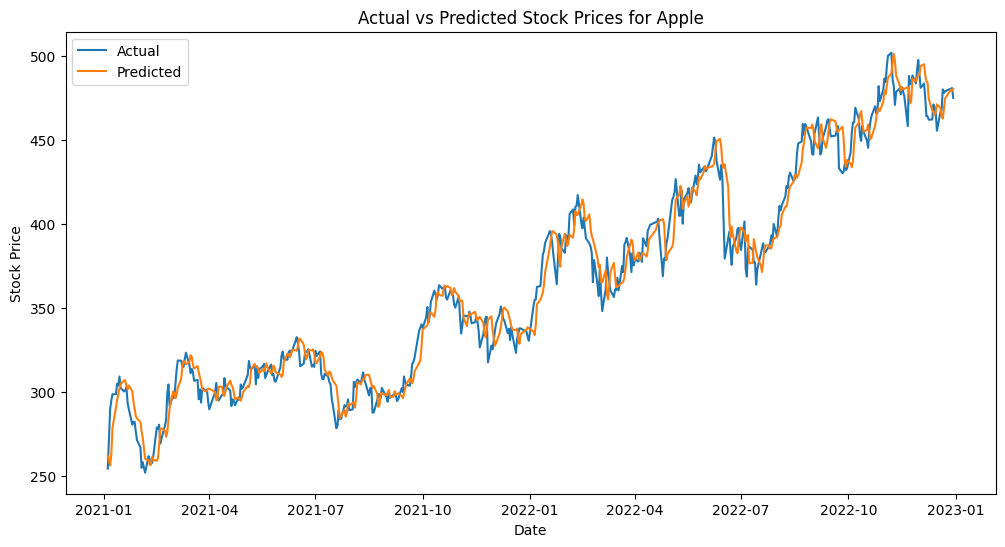

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions
predictions = CNN_1.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print('RMSE:', rmse)
print('MAE:', mae)
print('MSE:', mse)

accuracy_percentage = r_squared * 100
print('Accuracy Percentage (R-squared): {:.2f}%'.format(accuracy_percentage))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices for Apple')
plt.show()

## CNN 5

[*********************100%***********************]  1 of 1 completed


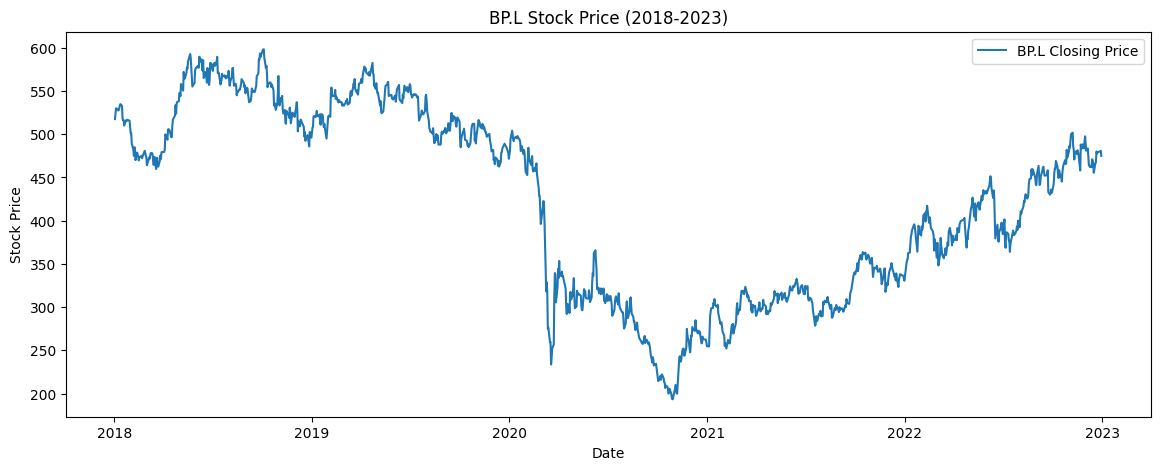

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for BP.L
df = yf.download('BP.L', start='2018-01-01', end='2023-01-01')

# Plot the historical closing price data
plt.figure(figsize=(14, 5))
plt.plot(df['Close'], label='BP.L Closing Price')
plt.title('BP.L Stock Price (2018-2023)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Prepare data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

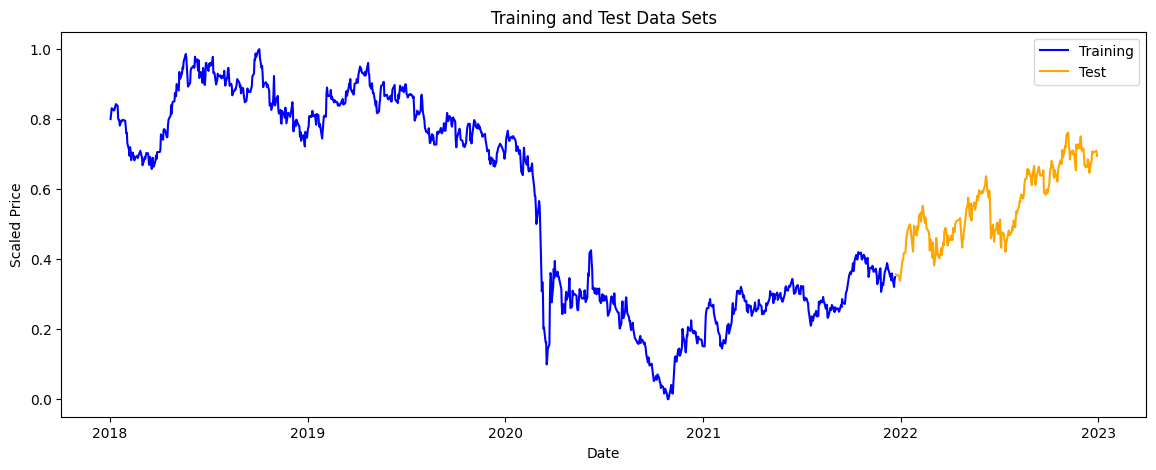

In [ ]:
# Define split points for the 80-20 split
q_80 = int(len(scaled_data) * 0.8)
q_20 = int(len(scaled_data) * 0.2)

# Split data into training and test sets using the new split
train_data = scaled_data[:q_80]  # 80% of the dataset for training
test_data = scaled_data[q_80:]  # Remaining 20% of the dataset for testing

# Plot the split data showing only training and test data
plt.figure(figsize=(14, 5))
plt.plot(df.index[:q_80], train_data, color='blue', label='Training')
plt.plot(df.index[q_80:], test_data, color='orange', label='Test')
plt.title('Training and Test Data Sets')
plt.xlabel('Date')
plt.ylabel('Scaled Price')
plt.legend()
plt.show()


In [ ]:
# Calculate and print the min and max values for each dataset
print("Training Data - Min:", np.min(train_data), "Max:", np.max(train_data))
print("Test Data - Min:", np.min(test_data), "Max:", np.max(test_data))

Training Data - Min: 0.0 Max: 1.0
Test Data - Min: 0.33853678436404855 Max: 0.7616459924627925


In [ ]:
# Create sequences
def create_sequences(data, seq_length):
  X, y = [], []
  for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(X), np.array(y)

seq_length = 7  # 7-day lag
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
# Reshape input for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Print the shapes of the datasets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (999, 7, 1)
X_test shape: (245, 7, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import mean_squared_error

# Build CNN model
CNN_1 = Sequential(name='CNN_1')
CNN_1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
CNN_1.add(MaxPooling1D(pool_size=2))
CNN_1.add(MaxPooling1D(pool_size=1))
CNN_1.add(Flatten())
CNN_1.add(Dense(units=1))

# Compile and train the model
CNN_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mse'])

CNN_1.fit(X_train, y_train, epochs=50, batch_size=32)

CNN_1.summary()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1649 - mean_absolute_error: 0.3382 - mse: 0.1649
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0071 - mean_absolute_error: 0.0660 - mse: 0.0071
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035 - mean_absolute_error: 0.0475 - mse: 0.0035
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 - mean_absolute_error: 0.0347 - mse: 0.0021
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - mean_absolute_error: 0.0275 - mse: 0.0015
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014 - mean_absolute_error: 0.0256 - mse: 0.0014
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015 - mean_absolute_error: 0.0265 - mse: 0.0015
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 - mean_absolute_error: 0.0245 - mse: 0.0013
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - mean_absolute_error: 0.0264 - mse: 0.0014
Epoch 10/50
32/32 ━━━━━━━━━━━━

Model: "CNN_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 5, 64)               │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,157 (4.52 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 772 (3.02 KB)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
RMSE: 12.998061513852011
MAE: 10.646041434151789
MSE: 168.94960311788083
Accuracy Percentage (R-squared): 89.22%


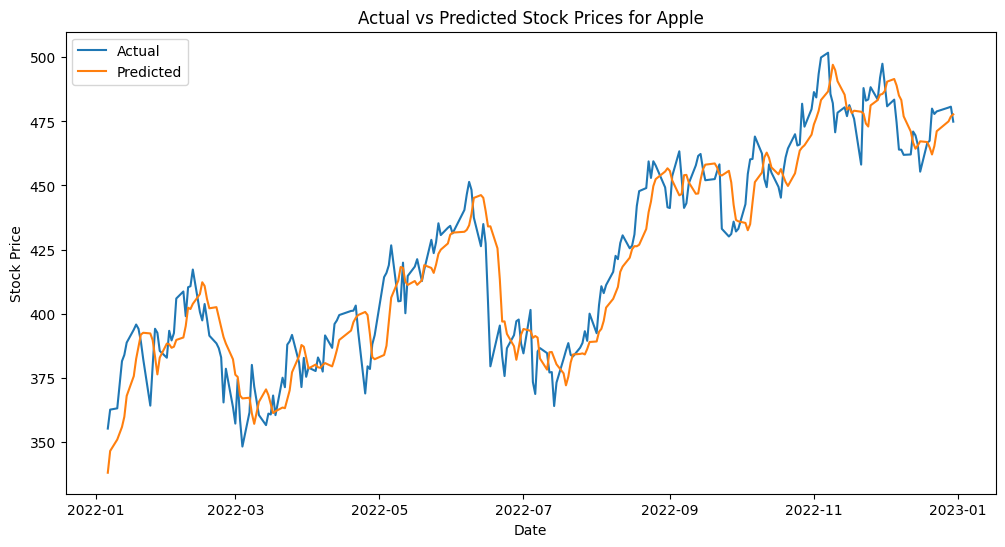

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions
predictions = CNN_1.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print('RMSE:', rmse)
print('MAE:', mae)
print('MSE:', mse)

accuracy_percentage = r_squared * 100
print('Accuracy Percentage (R-squared): {:.2f}%'.format(accuracy_percentage))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices for Apple')
plt.show()

## CNN feature Engineering

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Download historical data for BP.L
df = yf.download('BP.L', start='2018-01-01', end='2023-01-01')

# Feature Engineering
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()
delta = df['Close'].diff()
up = delta.clip(lower=0)
down = -1 * delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up / ema_down
df['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close Prices
for i in range(1, 6):
    df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

# Drop missing values due to feature engineering
df.dropna(inplace=True)

# Print the first few rows of the DataFrame
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200,RSI,Close_Lagged_1,Close_Lagged_2,Close_Lagged_3,Close_Lagged_4,Close_Lagged_5
Date,,,,,,,,,,,,,,
2018-10-15,560.099976,564.299988,555.200012,559.400024,401.205872,26180580,562.658,537.44025,42.374882,558.000000,554.400024,569.200012,579.000000,576.599976
2018-10-16,557.700012,560.599976,549.799988,560.099976,401.707794,28181763,562.524,537.65325,42.931674,559.400024,558.000000,554.400024,569.200012,579.000000
2018-10-17,566.299988,567.200012,554.000000,558.299988,400.416779,31002931,562.164,537.82375,41.812809,560.099976,559.400024,558.000000,554.400024,569.200012
2018-10-18,556.400024,560.299988,549.700012,554.500000,397.691467,22864554,561.720,537.94625,39.473932,558.299988,560.099976,559.400024,558.000000,554.400024
2018-10-19,556.000000,565.900024,554.299988,557.500000,399.843048,29346253,561.582,538.08575,42.221740,554.500000,558.299988,560.099976,559.400024,558.000000


In [ ]:
# Prepare data
features = ['Close', 'SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']
data = df[features].values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define split points
q_80 = int(len(scaled_data) * 0.8)
q_90 = int(len(scaled_data) * 0.9)

# Split data into training, validation, and test sets
train_data = scaled_data[:q_80]
val_data = scaled_data[q_80:q_90]
test_data = scaled_data[q_90:]

# Create sequences (with 0 lag)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, 1:])  # Sequence of technical indicators (excluding 'Close')
        y.append(data[i + seq_length, 0])  # Predict the next 'Close' price
    return np.array(X), np.array(y)

seq_length = 10  # Adjust sequence length for capturing historical patterns
X_train, y_train = create_sequences(train_data, seq_length)
X_val, y_val = create_sequences(val_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
import time
from keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Build CNN model with improved architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, len(features)-1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))  # Add dropout for regularization
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Start the stopwatch
start_time = time.time()

# Train the model with updated settings and include the early stopping callback
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Stop the stopwatch
end_time = time.time()

# Calculate and display the training time
training_time_seconds = end_time - start_time
print('Training Time: {:.2f} seconds'.format(training_time_seconds))

# Display model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0789 - mean_absolute_error: 0.2055 - val_loss: 0.0024 - val_mean_absolute_error: 0.0370
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0140 - mean_absolute_error: 0.0914 - val_loss: 0.0026 - val_mean_absolute_error: 0.0410
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0114 - mean_absolute_error: 0.0792 - val_loss: 0.0023 - val_mean_absolute_error: 0.0339
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0082 - mean_absolute_error: 0.0691 - val_loss: 0.0021 - val_mean_absolute_error: 0.0360
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0674 - val_loss: 0.0021 - val_mean_absolute_error: 0.0378
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0096 - mean_absolute_error: 0.0688 - val_loss: 0.0019 - val_mean_absolute_error: 0.0318
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0692 - val_lo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 8, 64)               │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,573 (115.52 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,716 (77.02 KB)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
RMSE: 13.733643931108507
MAE: 11.440256244094414
MSE: 188.6129756264735
Accuracy Percentage (R-squared): 40.53%


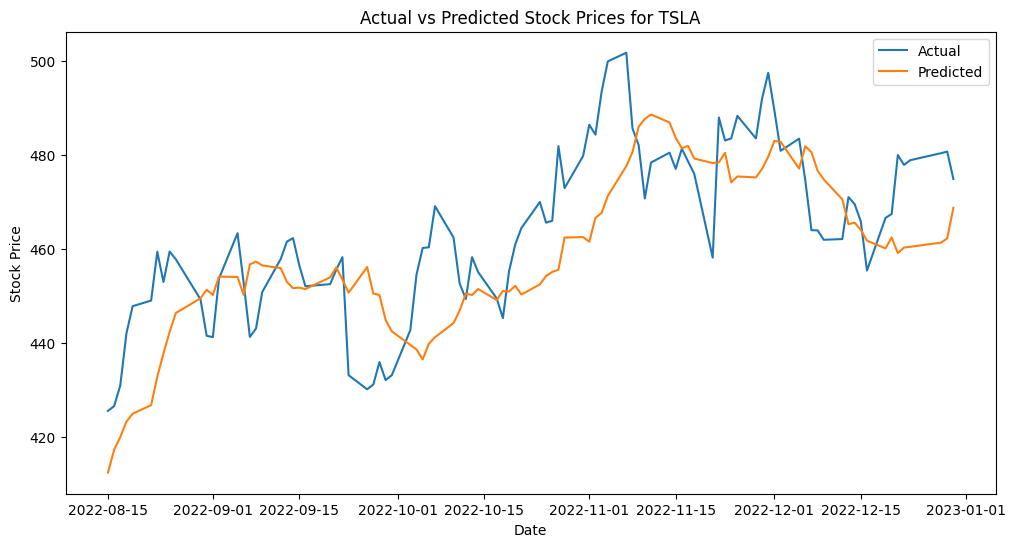

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((len(predictions), len(features)-1))), axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), len(features)-1))), axis=1))[:, 0]

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print('RMSE:', rmse)
print('MAE:', mae)
print('MSE:', mse)

accuracy_percentage = r_squared * 100
print('Accuracy Percentage (R-squared): {:.2f}%'.format(accuracy_percentage))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.show()

## CNN hypertuining parameters

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Download historical data for BP.L
df = yf.download('BP.L', start='2016-01-01', end='2023-01-01')

# Prepare data
data = df['Close'].values.reshape(-1, 1)

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Split data and reshape for CNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 7
X, y = create_sequences(scaled_data, seq_length)

[*********************100%***********************]  1 of 1 completed


In [ ]:
#70 / 15 / 15 split
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.1765, random_state=42)

# Reshape for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Model 1: Basic CNN
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')

# Model 2: CNN with Dropout
model2 = Sequential()
model2.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Dropout(0.25))  # Added dropout
model2.add(Flatten())
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

# Model 3: Deeper CNN
model3 = Sequential()
model3.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu'))  # Added another Conv1D layer
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train models
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Update the evaluate_model function to include additional metrics
def evaluate_model(model, X_test, y_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)

    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return rmse, mae, mse, r2

# Evaluate models on test set
rmse1, mae1, mse1, r2_1 = evaluate_model(model1, X_test, y_test, scaler)
rmse2, mae2, mse2, r2_2 = evaluate_model(model2, X_test, y_test, scaler)
rmse3, mae3, mse3, r2_3 = evaluate_model(model3, X_test, y_test, scaler)

# Print evaluation metrics
print("Model 1 (Basic CNN) - RMSE:", rmse1, "MAE:", mae1, "MSE:", mse1, "R^2:", r2_1)
print("Model 2 (CNN with Dropout) - RMSE:", rmse2, "MAE:", mae2, "MSE:", mse2, "R^2:", r2_2)
print("Model 3 (Deeper CNN) - RMSE:", rmse3, "MAE:", mae3, "MSE:", mse3, "R^2:", r2_3)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1551 - val_loss: 0.0061
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - val_loss: 0.0022
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - val_l

## CNN Combine 1

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/CNN1_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Download historical data for BP.L
df = yf.download('BP.L', start='2016-01-01', end='2023-01-01')

def feature_engineering(df):
    # Compute SMA
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()

    # Compute RSI
    df['RSI'] = compute_rsi(df['Close'])

    # Create lagged features
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

# Feature Selection
feature_columns = [
    'SMA_50', 'SMA_200', 'RSI',
    'Close_Lagged_1', 'Close_Lagged_2',
    'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']

[*********************100%***********************]  1 of 1 completed


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare X and y
X = df[feature_columns].values
y = df['Close'].values

# Standardize features
# Create a MinMaxScaler instance and fit data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


# Reshape for CNN
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [ ]:
# Function to build model
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X.shape[1], X.shape[2])))

    # Add first Conv1D layer
    model.add(Conv1D(filters=hp.Int('filters', min_value=64, max_value=128, step=16), kernel_size=2, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=1))

    # Adding additional Conv1D layers according to hyperparameters
    for _ in range(hp.Int('num_layers', 1, 2)):
        model.add(Conv1D(filters=hp.Int('filters', min_value=64, max_value=128, step=16), kernel_size=2, activation='relu', padding='same'))
        model.add(MaxPooling1D(pool_size=1))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    model.add(Flatten())
    model.add(Dense(1))

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):

    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='CNN1_Stock_Prediction'
    )

    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                 callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"Filters: {best_hyperparameters.get('filters')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

Trial 10 Complete [00h 00m 20s]
val_loss: 4410.56689453125

Best val_loss So Far: 36.252140045166016
Total elapsed time: 00h 02m 59s
Best Hyperparameters:
Number of Layers: 2
Filters: 128
Dropout Rate: 0.3
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 9095.4902 - mean_absolute_error: 72.8988 - mean_squared_error: 9095.4902 - val_loss: 44.5040 - val_mean_absolute_error: 5.3580 - val_mean_squared_error: 44.5040
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3258.4753 - mean_absolute_error: 45.4949 - mean_squared_error: 3258.4753 - val_loss: 133.5901 - val_mean_absolute_error: 10.1731 - val_mean_squared_error: 133.5901
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3080.7546 - mean_absolute_error: 44.2117 - mean_squared_error: 3080.7546 - val_loss: 141.5826 - val_mean_absolute_error: 10.6016 - val_mean_squared_error: 141.5826
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2853.9602 - mean_absolute_error: 42.2225 - mean_squared_error: 2853.9602 - val_loss: 39.7146 - val_mean_absolute_error: 4.9903 - val_mean_squared_error: 39.7146
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2944.9146 - mean_absolute_error: 42.4186 - mean_squared_error: 2944.91

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 5545.5552 - mean_absolute_error: 56.9794 - mean_squared_error: 5545.5552 - val_loss: 68.4068 - val_mean_absolute_error: 6.5096 - val_mean_squared_error: 68.4068
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2947.2429 - mean_absolute_error: 42.3476 - mean_squared_error: 2947.2429 - val_loss: 227.4579 - val_mean_absolute_error: 13.1480 - val_mean_squared_error: 227.4579
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2838.0872 - mean_absolute_error: 40.8654 - mean_squared_error: 2838.0872 - val_loss: 2104.7095 - val_mean_absolute_error: 45.0123 - val_mean_squared_error: 2104.7095
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4306.9180 - mean_absolute_error: 52.3868 - mean_squared_error: 4306.9180 - val_loss: 701.6171 - val_mean_absolute_error: 25.2549 - val_mean_squared_error: 701.6171
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3144.0471 - mean_absolute_error: 43.4832 - mean_squared_error:

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Reloading Tuner from project_dir/CNN1_Stock_Prediction/tuner0.json
Best Hyperparameters:
Number of Layers: 2
Filters: 128
Dropout Rate: 0.3
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 6509.1401 - mean_absolute_error: 64.5819 - mean_squared_error: 6509.1401 - val_loss: 91.2335 - val_mean_absolute_error: 7.8503 - val_mean_squared_error: 91.2335
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3474.4917 - mean_absolute_error: 46.1860 - mean_squared_error: 3474.4917 - val_loss: 47.7532 - val_mean_absolute_error: 5.4879 - val_mean_squared_error: 47.7532
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3657.5190 - mean_absolute_error: 47.5162 - mean_squared_error: 3657.5190 - val_loss: 99.3377 - val_mean_absolute_error: 8.3711 - val_mean_squared_error: 99.3377
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3265.2473 - mean_absolute_error: 46.0538 - mean_squared_error: 3265.2473 - val_loss: 156.7897 - val_mean_absolute_error: 11.1117 - val_mean_squared_error: 156.7897
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3521.3311 - mean_absolute_error: 47.8129 - mean_squared_error: 3521.3311 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


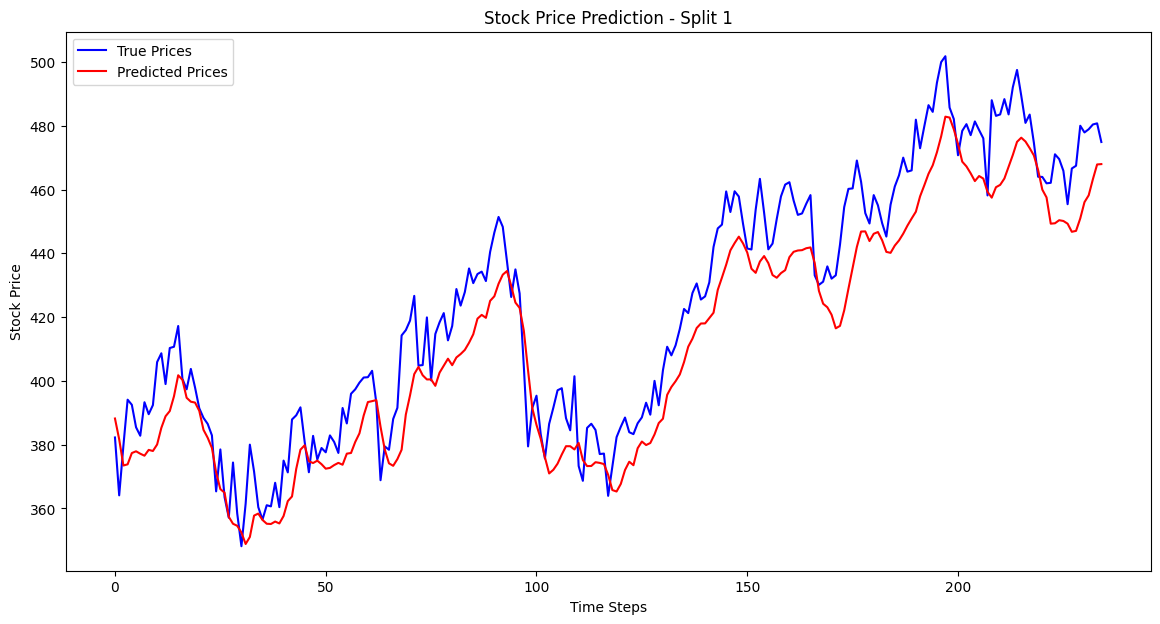

Split 1: MSE: 225.78570909756533, RMSE: 15.026167478687482, MAE: 12.90523253095911, R²: 0.8545955708173512
Split 2: MSE: 171.7147116690435, RMSE: 13.103996019117355, MAE: 10.81619068315834, R²: 0.8593064039792634
Split 3: MSE: 84.6786980839214, RMSE: 9.202102916394784, MAE: 7.4026578958042135, R²: 0.9627255571294643


In [ ]:
# For split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)

mse_1, rmse_1, mae_1, r2_1, y_pred_1, CNN_1_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# For split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)

mse_2, rmse_2, mae_2, r2_2, y_pred_2, CNN_1_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# For split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)

mse_3, rmse_3, mae_3, r2_3, y_pred_3, CNN_1_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Plot predictions for the first split
plt.figure(figsize=(14, 7))
plt.plot(y_test_1, label='True Prices', color='blue')
plt.plot(y_pred_1, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction - Split 1')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the results for each split
print(f"Split 1: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}")
print(f"Split 2: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}")
print(f"Split 3: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}")

In [ ]:
# Compare MSE, RMSE, MAE, and R2 from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Metrics for the 70/15/15 split: MSE: 225.78570909756533, RMSE: 15.026167478687482, MAE: 12.90523253095911, R²: 0.8545955708173512
Metrics for the 80/10/10 split: MSE: 171.7147116690435, RMSE: 13.103996019117355, MAE: 10.81619068315834, R²: 0.8593064039792634
Metrics for the 60/20/20 split: MSE: 84.6786980839214, RMSE: 9.202102916394784, MAE: 7.4026578958042135, R²: 0.9627255571294643


In [ ]:
CNN_1_model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1, 128)              │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 128)              │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1, 128)              │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204,293 (798.02 KB)

 Trainable params: 68,097 (266.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 136,196 (532.02 KB)

In [ ]:
# Save the best model
CNN_1_model_2.save('CNN1_best_model.h5')

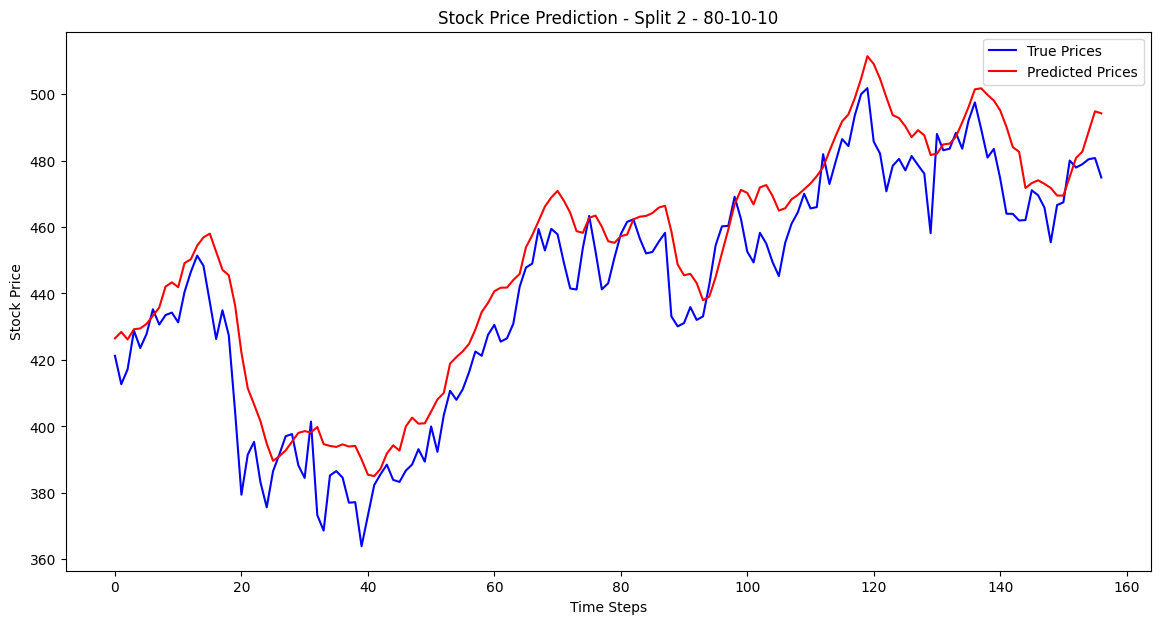

Split 1: MSE: 171.7147116690435, RMSE: 13.103996019117355, MAE: 10.81619068315834, R²: 0.8593064039792634


In [ ]:
# Plotting True vs Predicted Prices
import matplotlib.pyplot as plt
# Plot predictions for the first split
plt.figure(figsize=(14, 7))
plt.plot(y_test_2, label='True Prices', color='blue')
plt.plot(y_pred_2, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction - Split 2 - 80-10-10')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the results
print(f"Split 1: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}")

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('CNN1_best_model.h5')

# Now you can use `loaded_model` to make predictions
y_pred = loaded_model.predict(X_test_2)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


## CNN Combine 2

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/CNN2_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import keras_tuner as kt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner import RandomSearch

# Download historical data for BP.L
df = yf.download('BP.L', start='2016-01-01', end='2023-01-01')

# Feature Engineering
def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)
    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

# Prepare data
X = df[['SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']].values
y = df['Close'].values

# Create a MinMaxScaler instance and fit data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape data for CNN
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Initialise variables to store the best model and metrics
best_model = None
best_mse = float('inf')
best_params = {}

<ipython-input-6-ca8150bd39a8>:14: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch
[*********************100%***********************]  1 of 1 completed


In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X.shape[1], X.shape[2])))

    # Increase input layer filters
    model.add(Conv1D(filters=hp.Int('filters', min_value=128, max_value=256, step=16), kernel_size=2, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(hp.Float('dropout_1', 0.2, 0.5, step=0.1)))

    # Added Batch Normalization
    model.add(BatchNormalization())

    # Add more Conv1D layers, but adjust sizes dynamically
    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(Conv1D(filters=hp.Int('filters', min_value=64, max_value=128, step=16), kernel_size=2, activation='relu', padding='same'))
        model.add(MaxPooling1D(pool_size=1))
        model.add(Dropout(hp.Float('dropout_2_' + str(i), 0.2, 0.5, step=0.1)))

    model.add(Flatten())

    # Adjust regularization
    l2_reg = hp.Float('l2_regularization', 0.01, 0.1, step=0.01)
    model.add(Dense(1, kernel_regularizer=l2(l2_reg)))

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-4, 1e-5, 1e-6, 1e-7])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    # Print model summary
    model.summary()

    return model

In [ ]:
def run_experiment(X_train, y_train, X_val, y_val, X_test, y_test):
    global best_model, best_mse, best_params

    # Hyperparameter tuning setup
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='CNN2_Stock_Prediction'
    )

    # Search for the best hyperparameters
    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    # Get the best model and its hyperparameters
    current_model = tuner.get_best_models(num_models=1)[0]
    best_hyperparams = tuner.get_best_hyperparameters(num_trials=1)[0]

    # Model Training
    history = current_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    # Evaluation on the test set
    y_pred = current_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, current_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, CNN_2_model_1 = run_experiment(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, CNN_2_model_2 = run_experiment(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, CNN_2_model_3 = run_experiment(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Trial 10 Complete [00h 00m 08s]
val_loss: 102492.0390625

Best val_loss So Far: 229.2577667236328
Total elapsed time: 00h 04m 58s


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1, 160)              │           2,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 160)              │             640 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 160)              │          51,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1, 160)              │          51,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 1, 160)              │          51,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 157,601 (615.63 KB)

 Trainable params: 157,281 (614.38 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 4599.3760 - mean_absolute_error: 53.3877 - mean_squared_error: 4599.3457 - val_loss: 201.8104 - val_mean_absolute_error: 11.0012 - val_mean_squared_error: 201.7800
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4660.9858 - mean_absolute_error: 54.5654 - mean_squared_error: 4660.9556 - val_loss: 195.6647 - val_mean_absolute_error: 10.7962 - val_mean_squared_error: 195.6347
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4253.9111 - mean_absolute_error: 52.5160 - mean_squared_error: 4253.8809 - val_loss: 189.3520 - val_mean_absolute_error: 10.7263 - val_mean_squared_error: 189.3222
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4923.6426 - mean_absolute_error: 56.7278 - mean_squared_error: 4923.6123 - val_loss: 212.1169 - val_mean_absolute_error: 11.4091 - val_mean_squared_error: 212.0873
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4550.7002 - mean_absolute_error: 53.8326 - mean_squared_error: 4

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1, 160)              │           2,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 160)              │             640 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 160)              │          51,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1, 160)              │          51,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 1, 160)              │          51,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 157,601 (615.63 KB)

 Trainable params: 157,281 (614.38 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 4900.1016 - mean_absolute_error: 54.5589 - mean_squared_error: 4900.0708 - val_loss: 932.6260 - val_mean_absolute_error: 22.9121 - val_mean_squared_error: 932.5958
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3776.8896 - mean_absolute_error: 48.5330 - mean_squared_error: 3776.8596 - val_loss: 726.4595 - val_mean_absolute_error: 20.3234 - val_mean_squared_error: 726.4296
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4539.7607 - mean_absolute_error: 52.3215 - mean_squared_error: 4539.7314 - val_loss: 610.5139 - val_mean_absolute_error: 18.5756 - val_mean_squared_error: 610.4843
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3729.9290 - mean_absolute_error: 47.8124 - mean_squared_error: 3729.8992 - val_loss: 490.4553 - val_mean_absolute_error: 16.7864 - val_mean_squared_error: 490.4259
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3497.3457 - mean_absolute_error: 47.0336 - mean_squared_error: 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1, 160)              │           2,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 160)              │             640 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 160)              │          51,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1, 160)              │          51,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 1, 160)              │          51,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 157,601 (615.63 KB)

 Trainable params: 157,281 (614.38 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 9857.4561 - mean_absolute_error: 83.0122 - mean_squared_error: 9857.4258 - val_loss: 955.7050 - val_mean_absolute_error: 22.3980 - val_mean_squared_error: 955.6740
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4510.9253 - mean_absolute_error: 53.7412 - mean_squared_error: 4510.8945 - val_loss: 1402.9099 - val_mean_absolute_error: 28.5174 - val_mean_squared_error: 1402.8790
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4403.3428 - mean_absolute_error: 52.5919 - mean_squared_error: 4403.3120 - val_loss: 1954.6648 - val_mean_absolute_error: 35.6574 - val_mean_squared_error: 1954.6342
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4298.9536 - mean_absolute_error: 52.8685 - mean_squared_error: 4298.9229 - val_loss: 1853.8379 - val_mean_absolute_error: 34.1818 - val_mean_squared_error: 1853.8075
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5044.2886 - mean_absolute_error: 55.6979 - mean_square

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Metrics for the 70/15/15 split: MSE: 417.48791871451317, RMSE: 20.432521105201708, MAE: 15.945126018118351, R²: 0.7311406786817294
Metrics for the 80/10/10 split: MSE: 403.98709307506584, RMSE: 20.099430167919333, MAE: 16.095711288938098, R²: 0.6689951820770998
Metrics for the 60/20/20 split: MSE: 932.7321087683971, RMSE: 30.54066320118797, MAE: 26.182218411479134, R²: 0.5894236627570049


## CNN Combine 3

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Download historical data for BP.L
df = yf.download('BP.L', start='2016-01-01', end='2023-01-01')

# Feature Engineering
def feature_engineering(df):
    # Compute SMA
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()

    # Compute RSI
    df['RSI'] = compute_rsi(df['Close'])

    # Compute MACD
    df['MACD'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()

    # Compute Bollinger Bands
    df['Bollinger_High'] = df['SMA_50'] + (df['Close'].rolling(window=50).std() * 2)
    df['Bollinger_Low'] = df['SMA_50'] - (df['Close'].rolling(window=50).std() * 2)

    # Calculate Volatility as Percentage Change
    df['Volatility'] = df['Close'].pct_change().rolling(window=20).std()

    # Extract Day, Month, Year
    df['Day'] = df.index.day
    df['Month'] = df.index.month
    df['Year'] = df.index.year

    # Create lagged features
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
feature_columns = [
    'SMA_50', 'SMA_200', 'RSI', 'MACD',
    'Bollinger_High', 'Bollinger_Low',
    'Volatility', 'Day', 'Month', 'Year',
    'Close_Lagged_1', 'Close_Lagged_2',
    'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Prepare X and y
X = df[feature_columns].values
y = df['Close'].values

# Create a MinMaxScaler instance and fit data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape for CNN
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Function to build model
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X.shape[1], X.shape[2])))

    # Add first Conv1D layer
    model.add(Conv1D(filters=hp.Int('filters', min_value=64, max_value=128, step=16), kernel_size=2, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=1))

    # Adding additional Conv1D layers according to hyperparameters
    for _ in range(hp.Int('num_layers', 1, 4)):
        model.add(Conv1D(filters=hp.Int('filters', min_value=64, max_value=128, step=16), kernel_size=2, activation='relu', padding='same'))
        model.add(MaxPooling1D(pool_size=1))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    model.add(Flatten())
    model.add(Dense(1))  # Output layer for regression
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )
    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):

    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='CNN3_Stock_Prediction'
    )

    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"Filters: {best_hyperparameters.get('filters')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    # Evaluation
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# For split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)

mse_1, rmse_1, mae_1, r2_1, y_pred_1, CNN_3_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# For split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)

mse_2, rmse_2, mae_2, r2_2, y_pred_2, CNN_3_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# For split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)

mse_3, rmse_3, mae_3, r2_3, y_pred_3, CNN_3_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Compare MSE, RMSE, MAE, and R2 from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Reloading Tuner from project_dir/CNN3_Stock_Prediction/tuner0.json
Best Hyperparameters:
Number of Layers: 5
Filters: 128
Dropout Rate: 0.3
Learning Rate: 0.001
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 6841.8159 - mean_absolute_error: 64.8484 - mean_squared_error: 6841.8159 - val_loss: 198.6349 - val_mean_absolute_error: 13.0394 - val_mean_squared_error: 198.6349
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4771.1216 - mean_absolute_error: 54.4147 - mean_squared_error: 4771.1216 - val_loss: 147.4181 - val_mean_absolute_error: 10.7533 - val_mean_squared_error: 147.4181
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5536.1938 - mean_absolute_error: 59.2954 - mean_squared_error: 5536.1938 - val_loss: 1209.0972 - val_mean_absolute_error: 33.9651 - val_mean_squared_error: 1209.0972
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5431.8379 - mean_absolute_error: 56.5717 - mean_squared_error: 5431.8379 - val_loss: 200.2306 - val_mean_absolute_error: 12.5234 - val_mean_squared_error: 200.2306
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4986.8340 - mean_absolute_error: 55.0958 - mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 5518.9995 - mean_absolute_error: 58.4351 - mean_squared_error: 5518.9995 - val_loss: 485.0039 - val_mean_absolute_error: 20.5114 - val_mean_squared_error: 485.0039
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4980.2158 - mean_absolute_error: 55.8582 - mean_squared_error: 4980.2158 - val_loss: 605.2229 - val_mean_absolute_error: 23.2431 - val_mean_squared_error: 605.2229
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4814.2939 - mean_absolute_error: 53.0930 - mean_squared_error: 4814.2939 - val_loss: 1086.3634 - val_mean_absolute_error: 31.7925 - val_mean_squared_error: 1086.3634
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4508.2974 - mean_absolute_error: 52.6269 - mean_squared_error: 4508.2974 - val_loss: 1155.9087 - val_mean_absolute_error: 32.9537 - val_mean_squared_error: 1155.9087
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5534.3237 - mean_absolute_error: 58.6290 - mean_squared_erro

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 7017.4126 - mean_absolute_error: 66.5899 - mean_squared_error: 7017.4126 - val_loss: 143.0947 - val_mean_absolute_error: 10.1944 - val_mean_squared_error: 143.0947
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5588.3022 - mean_absolute_error: 59.5259 - mean_squared_error: 5588.3022 - val_loss: 197.3967 - val_mean_absolute_error: 12.1728 - val_mean_squared_error: 197.3967
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6387.5171 - mean_absolute_error: 64.0886 - mean_squared_error: 6387.5171 - val_loss: 148.9160 - val_mean_absolute_error: 10.4456 - val_mean_squared_error: 148.9160
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5528.2446 - mean_absolute_error: 59.8831 - mean_squared_error: 5528.2446 - val_loss: 134.2703 - val_mean_absolute_error: 8.8043 - val_mean_squared_error: 134.2703
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5495.0435 - mean_absolute_error: 58.2107 - mean_squared_error:

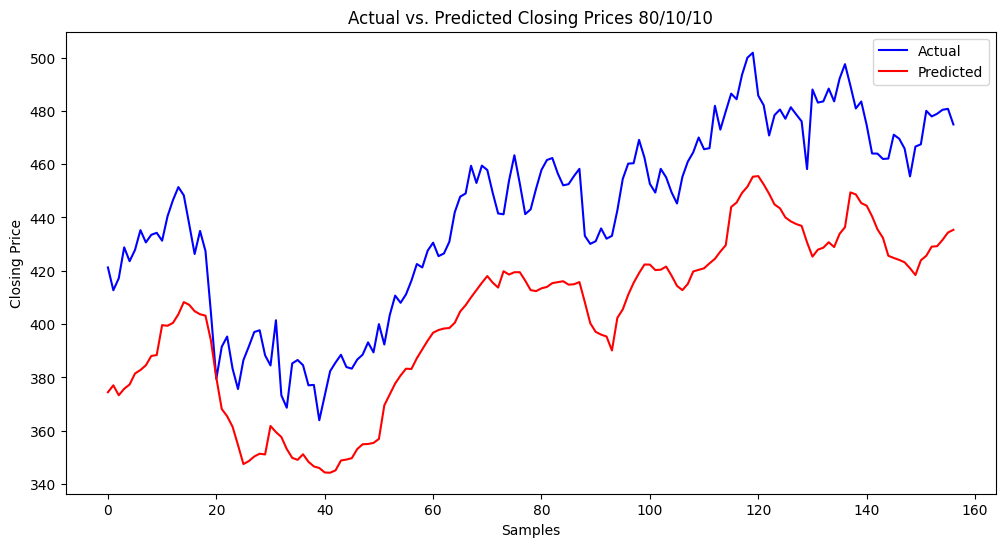

In [ ]:
import matplotlib.pyplot as plt
# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# RNN

## RNN 10

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get BP.L stock data for the past 10 years
data = yf.download('BP.L', start='2013-01-01', end='2023-01-01')
df = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Split the data into training and testing sets (80/20 split)
training_data_len = int(len(df) * 0.8)
train_data = df[0:training_data_len, :]
test_data = df[training_data_len:, :]

# Prepare the data for the RNN
def prepare_data(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback - 1):
        X.append(data[i:(i + lookback), 0])
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)

lookback = 60  # Number of days to lookback
X_train, y_train = prepare_data(train_data, lookback)
X_test, y_test = prepare_data(test_data, lookback)

# Reshape the data for the RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2270 - mae: 0.3220 - mse: 0.2270
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0014 - mae: 0.0285 - mse: 0.0014
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0014 - mae: 0.0270 - mse: 0.0014
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0011 - mae: 0.0254 - mse: 0.0011
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0014 - mae: 0.0261 - mse: 0.0014
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0013 - mae: 0.0274 - mse: 0.0013
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0011 - mae: 0.0250 - mse: 0.0011
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 7.7593e-04 - mae: 0.0208 - mse: 7.7593e-04
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 8.5349e-04 - mae: 0.0224 - mse: 8.5349e-04
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0012 - mae: 0.0267 - mse: 0.0012
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - 

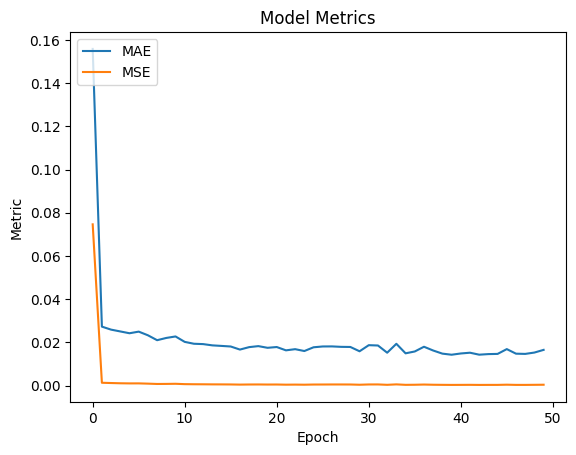

In [ ]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test[0], predictions[:, 0]))
mse = mean_squared_error(y_test[0], predictions[:, 0])
mae = mean_absolute_error(y_test[0], predictions[:, 0])
r2 = r2_score(y_test[0], predictions[:, 0])

print('RMSE:', rmse)
print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

# Plot training metrics
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('Model Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

## RNN 5 Years

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get BP.L stock data for the past 5 years
data = yf.download('BP.L', start='2018-01-01', end='2023-01-01')
df = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Split the data into training and testing sets (80/20 split)
training_data_len = int(len(df) * 0.8)
train_data = df[0:training_data_len, :]
test_data = df[training_data_len:, :]

# Prepare the data for the RNN
def prepare_data(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback - 1):
        X.append(data[i:(i + lookback), 0])
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)

lookback = 60  # Number of days to lookback
X_train, y_train = prepare_data(train_data, lookback)
X_test, y_test = prepare_data(test_data, lookback)

# Reshape the data for the RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0376 - mae: 0.1493 - mse: 0.0376
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0019 - mae: 0.0328 - mse: 0.0019
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 8.7725e-04 - mae: 0.0215 - mse: 8.7725e-04
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 7.3825e-04 - mae: 0.0209 - mse: 7.3825e-04
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 7.9053e-04 - mae: 0.0204 - mse: 7.9053e-04
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0011 - mae: 0.0261 - mse: 0.0011
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.2137e-04 - mae: 0.0187 - mse: 6.2137e-04
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.9043e-04 - mae: 0.0179 - mse: 5.9043e-04
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 7.3314e-04 - mae: 0.0206 - mse: 7.3314e-04
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 6.2234e-04 - mae: 0.0176 - mse: 6.2234e-04
Epoch 11/50
30

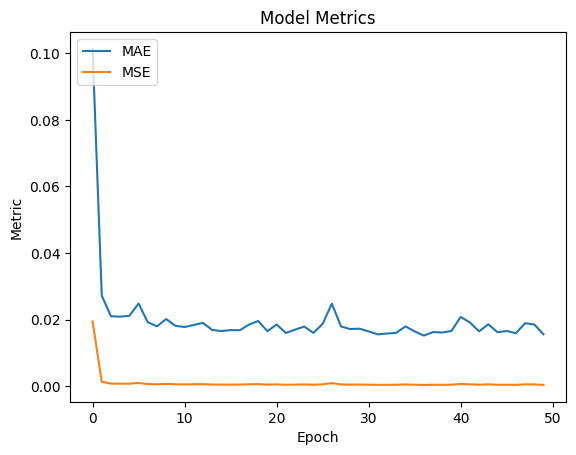

In [ ]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test[0], predictions[:, 0]))
mse = mean_squared_error(y_test[0], predictions[:, 0])
mae = mean_absolute_error(y_test[0], predictions[:, 0])
r2 = r2_score(y_test[0], predictions[:, 0])

print('RMSE:', rmse)
print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

# Plot training metrics
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('Model Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

## RNN Feature Engineering

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download historical data for BP.L for 7 years
start_date = '2016-01-01'
end_date = '2023-01-01'
df = yf.download('BP.L', start=start_date, end=end_date)

# Feature Engineering
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

# Calculate RSI
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close prices
for i in range(1, 6):
    df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

# Drop rows with missing values
df.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare data
features = ['Close', 'SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']
data = df[features].values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split data into training, validation, and test sets (70/15/15 split)
train_size = int(len(scaled_data) * 0.7)
val_size = int(len(scaled_data) * 0.15)
test_size = len(scaled_data) - train_size - val_size
train_data = scaled_data[:train_size]
val_data = scaled_data[train_size:train_size + val_size]
test_data = scaled_data[train_size + val_size:]

In [ ]:
# Create sequences for predicting 'Close' price
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 7  # 7-day lag
target_feature_index = features.index('Close')
X_train, y_train = create_sequences(train_data, seq_length)
X_val, y_val = create_sequences(val_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
# Build RNN model to predict 'Close' value
RNN3 = Sequential()
RNN3.add(SimpleRNN(units=64, activation='relu', input_shape=(seq_length, len(features))))
RNN3.add(Dense(units=1))

# Compile the model
RNN3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse', 'mape'])

# Train the model
history = RNN3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0087 - mae: 0.0713 - mape: 5977.0928 - mse: 0.0087 - val_loss: 8.1542e-04 - val_mae: 0.0224 - val_mape: 7.0223 - val_mse: 8.1542e-04
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - mae: 0.0227 - mape: 821.8851 - mse: 0.0010 - val_loss: 4.6421e-04 - val_mae: 0.0174 - val_mape: 5.6717 - val_mse: 4.6421e-04
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.4875e-04 - mae: 0.0213 - mape: 4156.5337 - mse: 9.4875e-04 - val_loss: 4.3186e-04 - val_mae: 0.0166 - val_mape: 5.3525 - val_mse: 4.3186e-04
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.8435e-04 - mae: 0.0193 - mape: 42691.9180 - mse: 6.8435e-04 - val_loss: 3.8817e-04 - val_mae: 0.0157 - val_mape: 5.0726 - val_mse: 3.8817e-04
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.9471e-04 - mae: 0.0194 - mape: 8070.5508 - mse: 6.9471e-04 - val_loss: 3.7685e-04 - val_mae: 0.0155 - val_mape: 5.0353 - val_mse: 3.7685e-04
Epoch 6/50
34/34 ━━━━

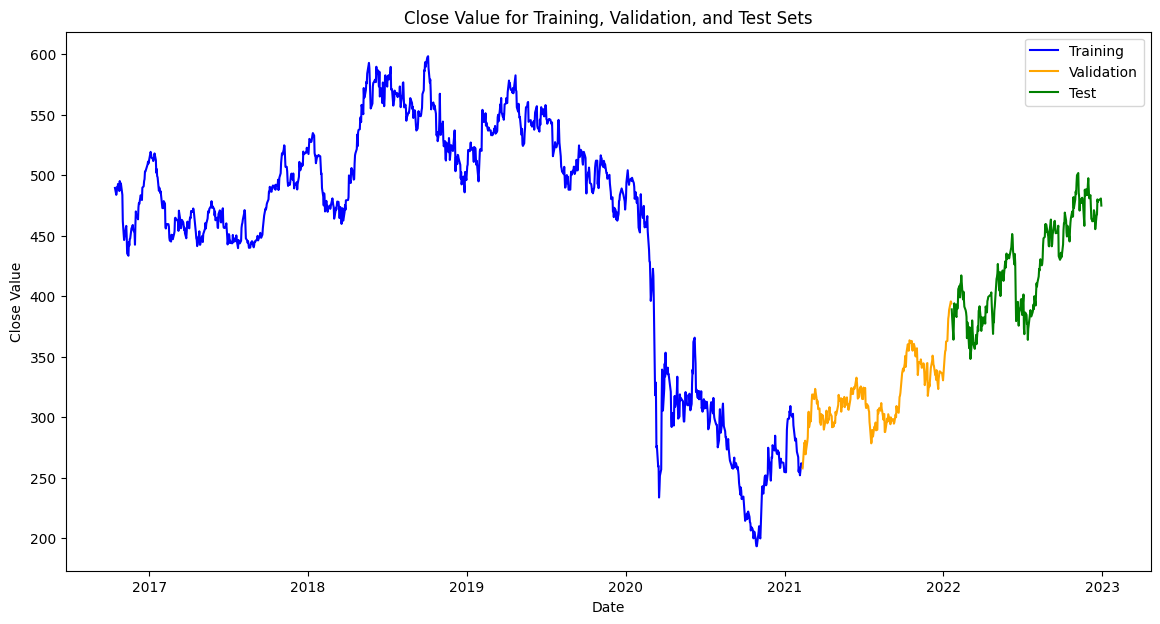

In [ ]:
import matplotlib.pyplot as plt

# Obtain the dates for each subset
train_dates = df.index[:train_size]
val_dates = df.index[train_size:train_size + val_size]
test_dates = df.index[train_size + val_size:]

# Obtain the close values for each subset
train_close = df['Close'][:train_size]
val_close = df['Close'][train_size:train_size + val_size]
test_close = df['Close'][train_size + val_size:]

# Plot the close value for each subset
plt.figure(figsize=(14, 7))
plt.plot(train_dates, train_close, label='Training', color='blue')
plt.plot(val_dates, val_close, label='Validation', color='orange')
plt.plot(test_dates, test_close, label='Test', color='green')

plt.title('Close Value for Training, Validation, and Test Sets')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.legend()
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
RMSE: 9.57955874994583
MAE: 7.4518055585858
MSE: 91.76794584366372
R-squared: 0.9407044052473476


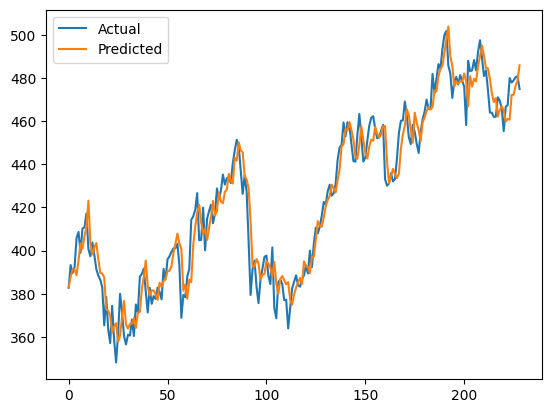

In [ ]:
# Make predictions for 'Close' value
predictions = RNN3.predict(X_test).flatten()  # Flatten predictions to (228,)
predictions = np.expand_dims(predictions, axis=1)  # Reshape predictions to (228,1)
predictions = np.concatenate((predictions, np.zeros((len(predictions), len(features) - 1))), axis=1)  # Add zeros to match the input shape
predictions = scaler.inverse_transform(predictions)[:, 0]  # Inverse transform and extract the first column

y_test = y_test.reshape(-1, 1)  # Reshape 'y_test' to match predictions
y_test = np.concatenate((y_test, np.zeros((len(y_test), len(features) - 1))), axis=1)  # Add zeros to match input shape
y_test = scaler.inverse_transform(y_test)[:, 0]  # Inverse transform and extract the first column

# Evaluate the model for 'Close' value prediction
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics for 'Close' value prediction
print('RMSE:', rmse)
print('MAE:', mae)
print('MSE:', mse)
print('R-squared:', r2)


# Plot the results
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

## RNN hypertunining parameter

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Download historical data for BP.L
df = yf.download('BP.L', start='2016-01-01', end='2023-01-01')

# Prepare data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 7
X, y = create_sequences(scaled_data, seq_length)

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.1765, random_state=42)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Model 1: Basic RNN
model1 = Sequential()
model1.add(SimpleRNN(64, activation='relu', input_shape=(seq_length, 1)))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')

# Model 2: RNN with Dropout
model2 = Sequential()
model2.add(SimpleRNN(64, activation='relu', input_shape=(seq_length, 1)))
model2.add(Dropout(0.25))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

# Model 3: Deeper RNN
model3 = Sequential()
model3.add(SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(seq_length, 1)))
model3.add(SimpleRNN(32, activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train models
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Function to evaluate model with additional metrics
def evaluate_model(model, X_test, y_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)

    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return rmse, mae, mse, r2

# Evaluate models on test set
rmse1, mae1, mse1, r2_1 = evaluate_model(model1, X_test, y_test, scaler)
rmse2, mae2, mse2, r2_2 = evaluate_model(model2, X_test, y_test, scaler)
rmse3, mae3, mse3, r2_3 = evaluate_model(model3, X_test, y_test, scaler)

# Print evaluation metrics
print("Model 1 (Basic RNN) - RMSE:", rmse1, "MAE:", mae1, "MSE:", mse1, "R^2:", r2_1)
print("Model 2 (RNN with Dropout) - RMSE:", rmse2, "MAE:", mae2, "MSE:", mse2, "R^2:", r2_2)
print("Model 3 (Deeper RNN) - RMSE:", rmse3, "MAE:", mae3, "MSE:", mse3, "R^2:", r2_3)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0424 - val_loss: 0.0012
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.0196e-04 - val_loss: 5.4260e-04
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1176e-04 - val_loss: 5.4738e-04
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6900e-04 - val_loss: 5.2999e-04
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3424e-04 - val_loss: 5.4310e-04
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1162e-04 - val_loss: 6.0529e-04
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9901e-04 - val_loss: 5.2604e-04
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7403e-04 - val_loss: 5.2081e-04
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6747e-04 - val_loss: 5.2714e-04
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7957e-04 - val_loss: 5.5513e-04
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0277e-04 - val_loss: 5.52

## RNN Combine 1

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/RNN1_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import EarlyStopping


# Download historical data for BP.L
df = yf.download('BP.L', start='2016-01-01', end='2023-01-01')
def feature_engineering(df):
    # Compute SMA
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()

    # Compute RSI
    df['RSI'] = compute_rsi(df['Close'])

    # Create lagged features
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))



# Apply feature engineering
df = feature_engineering(df)

# Select only the specified feature columns
feature_columns = [
    'SMA_50', 'SMA_200', 'RSI',
    'Close_Lagged_1', 'Close_Lagged_2',
    'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']

[*********************100%***********************]  1 of 1 completed


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Prepare X and y
X = df[feature_columns].values
y = df['Close'].values

# Standardise features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape for CNN
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [ ]:
def build_model(hp):
    model = Sequential()
    for _ in range(hp.Int('num_layers', 1, 3)):
        model.add(SimpleRNN(units=hp.Int('units', min_value=50, max_value=150, step=10), activation='relu', return_sequences=True))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))
    model.add(Flatten())
    model.add(Dense(1, activation='linear'))
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='RNN1_Stock_Prediction'
    )

    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                 callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

Trial 10 Complete [00h 00m 20s]
val_loss: 54587.9140625

Best val_loss So Far: 38.703922271728516
Total elapsed time: 00h 03m 43s
Best Hyperparameters:
Number of Layers: 2
units: 140
Dropout Rate: 0.5
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 6574.9272 - mean_absolute_error: 63.7583 - mean_squared_error: 6574.9272 - val_loss: 254.1325 - val_mean_absolute_error: 14.8256 - val_mean_squared_error: 254.1325
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6004.7251 - mean_absolute_error: 62.0216 - mean_squared_error: 6004.7251 - val_loss: 141.7216 - val_mean_absolute_error: 10.6043 - val_mean_squared_error: 141.7216
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5677.1899 - mean_absolute_error: 59.4530 - mean_squared_error: 5677.1899 - val_loss: 141.3446 - val_mean_absolute_error: 10.5549 - val_mean_squared_error: 141.3446
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4819.0259 - mean_absolute_error: 55.4455 - mean_squared_error: 4819.0259 - val_loss: 36.8318 - val_mean_absolute_error: 4.8877 - val_mean_squared_error: 36.8318
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5590.0645 - mean_absolute_error: 58.4079 - mean_squared_error: 5590

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 5267.2827 - mean_absolute_error: 56.9185 - mean_squared_error: 5267.2827 - val_loss: 558.6647 - val_mean_absolute_error: 22.1754 - val_mean_squared_error: 558.6647
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5169.7031 - mean_absolute_error: 55.8598 - mean_squared_error: 5169.7031 - val_loss: 121.9354 - val_mean_absolute_error: 8.7923 - val_mean_squared_error: 121.9354
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5118.0396 - mean_absolute_error: 57.5181 - mean_squared_error: 5118.0396 - val_loss: 95.3121 - val_mean_absolute_error: 7.5996 - val_mean_squared_error: 95.3121
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5206.3149 - mean_absolute_error: 56.9193 - mean_squared_error: 5206.3149 - val_loss: 72.3905 - val_mean_absolute_error: 6.6370 - val_mean_squared_error: 72.3905
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5071.2959 - mean_absolute_error: 54.4196 - mean_squared_error: 5071.295

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 5161.8550 - mean_absolute_error: 56.2095 - mean_squared_error: 5161.8550 - val_loss: 170.8118 - val_mean_absolute_error: 11.3460 - val_mean_squared_error: 170.8118
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6076.3628 - mean_absolute_error: 61.4746 - mean_squared_error: 6076.3628 - val_loss: 119.4523 - val_mean_absolute_error: 9.1232 - val_mean_squared_error: 119.4523
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6153.1396 - mean_absolute_error: 61.7109 - mean_squared_error: 6153.1396 - val_loss: 101.6854 - val_mean_absolute_error: 8.2809 - val_mean_squared_error: 101.6854
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6674.0132 - mean_absolute_error: 64.5024 - mean_squared_error: 6674.0132 - val_loss: 407.2820 - val_mean_absolute_error: 18.9241 - val_mean_squared_error: 407.2820
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6291.0386 - mean_absolute_error: 63.8441 - mean_squared_error: 629

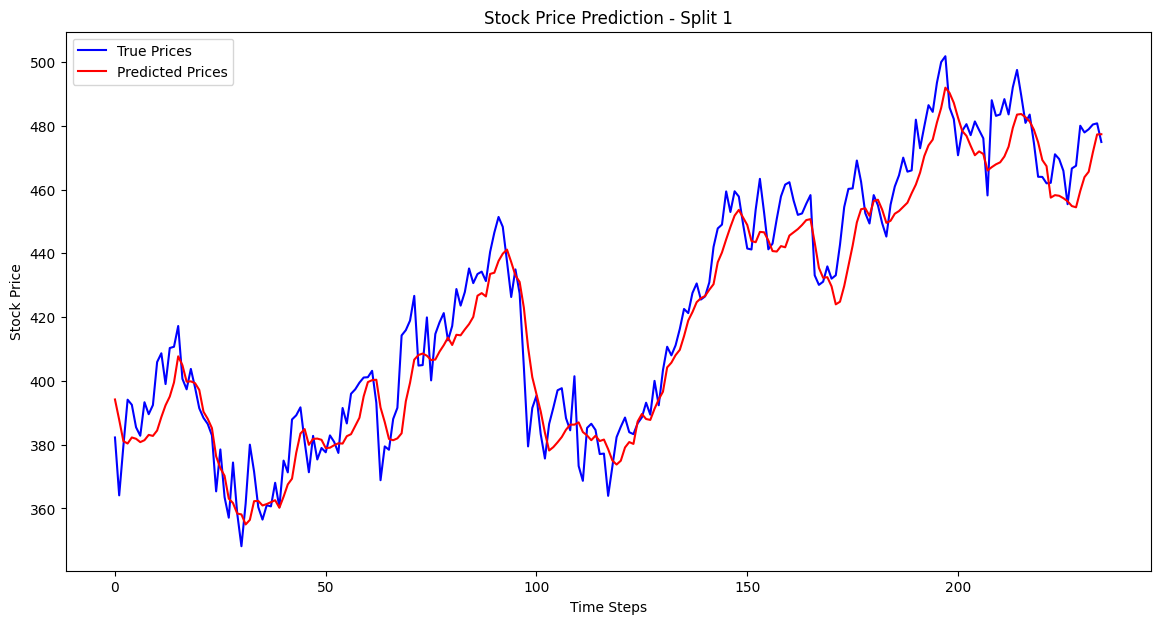

Split 1: MSE: 107.1094140991212, RMSE: 10.349367811568067, MAE: 8.368658187541556, R²: 0.9310222809077751
Split 2: MSE: 814.9242810179082, RMSE: 28.546878656306863, MAE: 27.067293981078326, R²: 0.33229583844857835
Split 3: MSE: 176.1342089122917, RMSE: 13.27155638620775, MAE: 10.785848111771166, R²: 0.9224680509241932


In [ ]:
# For split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)

mse_1, rmse_1, mae_1, r2_1, y_pred_1, RNN_1_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# For split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)

mse_2, rmse_2, mae_2, r2_2, y_pred_2, RNN_1_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# For split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)

mse_3, rmse_3, mae_3, r2_3, y_pred_3, RNN_1_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Plot predictions for the first split
plt.figure(figsize=(14, 7))
plt.plot(y_test_1, label='True Prices', color='blue')
plt.plot(y_pred_1, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction - Split 1')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the results for each split
print(f"Split 1: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}")
print(f"Split 2: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}")
print(f"Split 3: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}")

In [ ]:
# Compare MSE, RMSE, MAE, and R2 from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Metrics for the 70/15/15 split: MSE: 107.1094140991212, RMSE: 10.349367811568067, MAE: 8.368658187541556, R²: 0.9310222809077751
Metrics for the 80/10/10 split: MSE: 814.9242810179082, RMSE: 28.546878656306863, MAE: 27.067293981078326, R²: 0.33229583844857835
Metrics for the 60/20/20 split: MSE: 176.1342089122917, RMSE: 13.27155638620775, MAE: 10.785848111771166, R²: 0.9224680509241932


In [ ]:
RNN_1_model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 1, 140)              │          20,860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 140)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 1, 140)              │          39,340 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 140)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 140)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             141 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 181,025 (707.13 KB)

 Trainable params: 60,341 (235.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 120,684 (471.43 KB)

In [ ]:
# Save the best model
RNN_1_model_2.save('RNN1_best_model.h5')

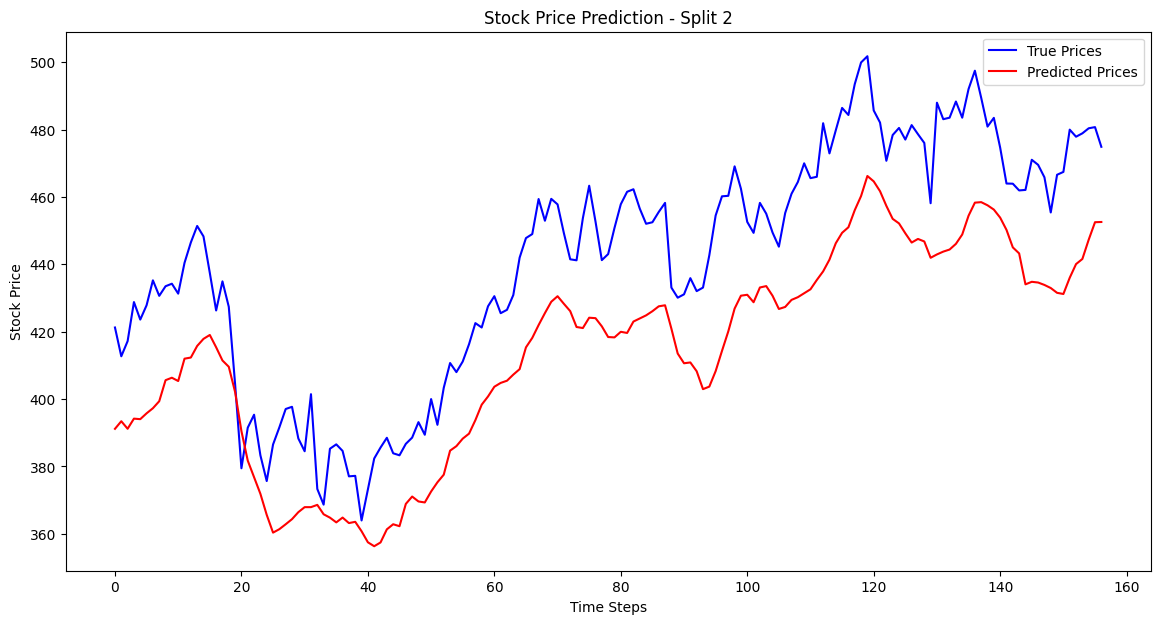

Split 2: MSE: 814.9242810179082, RMSE: 28.546878656306863, MAE: 27.067293981078326, R²: 0.33229583844857835


In [ ]:
# Plotting True vs Predicted Prices
import matplotlib.pyplot as plt
# Plot predictions for the first split
plt.figure(figsize=(14, 7))
plt.plot(y_test_2, label='True Prices', color='blue')
plt.plot(y_pred_2, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction - Split 2')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the results
print(f"Split 2: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}")

## RNN Combine 2

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/RNN2_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import keras_tuner as kt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner import RandomSearch


# Download historical data for BP.L
df = yf.download('BP.L', start='2016-01-01', end='2023-01-01')

# Feature Engineering
def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)
    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

# Prepare data
X = df[['SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']].values
y = df['Close'].values

# Standardize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


# Reshape data
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Initialise variables to store the best model and metrics
best_model = None
best_mse = float('inf')
best_params = {}

[*********************100%***********************]  1 of 1 completed


In [ ]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()

    # Add SimpleRNN layers
    for i in range(hp.Int('num_layers', 1, 4)):
        activation = hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])
        model.add(SimpleRNN(units=hp.Int('units', min_value=50, max_value=150, step=10),
                           activation=activation,
                           return_sequences=True))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    # Add Flatten layer
    model.add(Flatten())

    # Add Dense layer with linear activation
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='RNN2_Stock_Prediction'
    )


    # Perform hyperparameter tuning
    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),  callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])


    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, RNN_2_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, RNN_2_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, RNN_2_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Trial 10 Complete [00h 00m 20s]
val_loss: 91201.125

Best val_loss So Far: 55.93132400512695
Total elapsed time: 00h 03m 42s
Best Hyperparameters:
Number of Layers: 4
units: 90
Dropout Rate: 0.3
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 7949.5181 - mean_absolute_error: 69.7401 - mean_squared_error: 7949.5181 - val_loss: 648.4537 - val_mean_absolute_error: 24.3014 - val_mean_squared_error: 648.4537
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5624.5630 - mean_absolute_error: 57.9903 - mean_squared_error: 5624.5630 - val_loss: 94.3808 - val_mean_absolute_error: 7.8347 - val_mean_squared_error: 94.3808
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5568.3647 - mean_absolute_error: 59.1583 - mean_squared_error: 5568.3647 - val_loss: 190.8421 - val_mean_absolute_error: 11.2257 - val_mean_squared_error: 190.8421
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6881.3750 - mean_absolute_error: 64.7620 - mean_squared_error: 6881.3750 - val_loss: 1286.5577 - val_mean_absolute_error: 34.0560 - val_mean_squared_error: 1286.5577
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5868.1768 - mean_absolute_error: 59.8092 - mean_squared_error: 58

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 6529.5435 - mean_absolute_error: 62.6117 - mean_squared_error: 6529.5435 - val_loss: 2526.5100 - val_mean_absolute_error: 49.4155 - val_mean_squared_error: 2526.5100
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6228.8994 - mean_absolute_error: 62.5444 - mean_squared_error: 6228.8994 - val_loss: 1369.9291 - val_mean_absolute_error: 35.7642 - val_mean_squared_error: 1369.9291
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5299.8101 - mean_absolute_error: 57.8270 - mean_squared_error: 5299.8101 - val_loss: 314.7337 - val_mean_absolute_error: 14.2599 - val_mean_squared_error: 314.7337
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6178.3857 - mean_absolute_error: 60.3333 - mean_squared_error: 6178.3857 - val_loss: 424.7446 - val_mean_absolute_error: 16.7337 - val_mean_squared_error: 424.7446
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7660.4937 - mean_absolute_error: 69.3594 - mean_squared_erro

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 8465.9932 - mean_absolute_error: 74.2489 - mean_squared_error: 8465.9932 - val_loss: 94.3961 - val_mean_absolute_error: 7.7638 - val_mean_squared_error: 94.3961
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6394.6348 - mean_absolute_error: 62.7327 - mean_squared_error: 6394.6348 - val_loss: 970.5640 - val_mean_absolute_error: 27.6297 - val_mean_squared_error: 970.5640
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7259.2817 - mean_absolute_error: 68.4630 - mean_squared_error: 7259.2817 - val_loss: 366.2428 - val_mean_absolute_error: 14.5139 - val_mean_squared_error: 366.2428
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6174.7344 - mean_absolute_error: 62.5927 - mean_squared_error: 6174.7344 - val_loss: 262.4112 - val_mean_absolute_error: 13.6294 - val_mean_squared_error: 262.4112
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6147.9136 - mean_absolute_error: 63.4331 - mean_squared_error: 6147

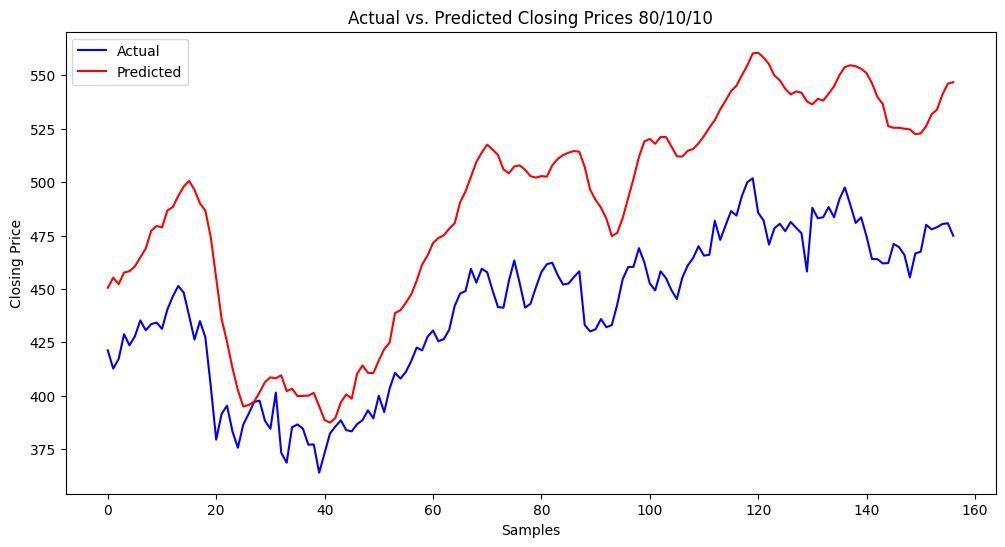

In [ ]:
# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## RNN Combine 3

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/RNN3_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import keras_tuner as kt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download historical data for BP.L
df = yf.download('BP.L', start='2016-01-01', end='2023-01-01')

def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    df['MACD'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['Bollinger_High'] = df['SMA_50'] + (df['Close'].rolling(window=50).std() * 2)
    df['Bollinger_Low'] = df['SMA_50'] - (df['Close'].rolling(window=50).std() * 2)
    df['Volatility'] = df['Close'].pct_change().rolling(window=20).std()
    df['Day'] = df.index.day
    df['Month'] = df.index.month
    df['Year'] = df.index.year

    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

feature_columns = [
    'SMA_50', 'SMA_200', 'RSI', 'MACD',
    'Bollinger_High', 'Bollinger_Low',
    'Volatility', 'Day', 'Month', 'Year',
    'Close_Lagged_1', 'Close_Lagged_2',
    'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5'
]

# Prepare X and y
X = df[feature_columns].values
y = df['Close'].values

# Standardise features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


# Reshape for RNN
X = X.reshape((X.shape[0], X.shape[1], 1))

[*********************100%***********************]  1 of 1 completed


In [ ]:
def build_model(hp):
    model = Sequential()

    # Input layer
    model.add(Input(shape=(X.shape[1], X.shape[2])))

    # Add SimpleRNN layer
    model.add(SimpleRNN(units=hp.Int('units', min_value=32, max_value=128, step=16),
                         activation='relu', return_sequences=True))

    # Adding additional SimpleRNN layers according to hyperparameters
    for _ in range(hp.Int('num_layers', 1, 5)):
        model.add(SimpleRNN(units=hp.Int('units', min_value=32, max_value=128, step=16),
                             activation='relu', return_sequences=True))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    # Final RNN layer without return_sequences
    model.add(SimpleRNN(units=hp.Int('units', min_value=32, max_value=128, step=16),
                         activation='relu'))

    # Output layer for regression
    model.add(Dense(1))

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='RNN3_Stock_Prediction'
    )


    # Perform hyperparameter tuning
    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),  callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, RNN_3_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, RNN_3_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, RNN_3_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Trial 10 Complete [00h 01m 10s]
val_loss: 264.9794006347656

Best val_loss So Far: 264.9794006347656
Total elapsed time: 00h 08m 12s
Best Hyperparameters:
Number of Layers: 3
units: 96
Dropout Rate: 0.5
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 36 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 60273.5625 - mean_absolute_error: 198.7790 - mean_squared_error: 60273.5625 - val_loss: 2308.2144 - val_mean_absolute_error: 46.0438 - val_mean_squared_error: 2308.2144
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 2335.9548 - mean_absolute_error: 37.9643 - mean_squared_error: 2335.9548 - val_loss: 696.6317 - val_mean_absolute_error: 22.1344 - val_mean_squared_error: 696.6317
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 1189.6589 - mean_absolute_error: 25.5653 - mean_squared_error: 1189.6589 - val_loss: 1328.5637 - val_mean_absolute_error: 34.5955 - val_mean_squared_error: 1328.5637
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 1796.2692 - mean_absolute_error: 31.8338 - mean_squared_error: 1796.2692 - val_loss: 261.5379 - val_mean_absolute_error: 12.6358 - val_mean_squared_error: 261.5379
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 938.6987 - mean_absolute_error: 23.0715 - mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 36 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 48412.7930 - mean_absolute_error: 177.7659 - mean_squared_error: 48412.7930 - val_loss: 2122.9163 - val_mean_absolute_error: 43.2437 - val_mean_squared_error: 2122.9163
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 3961.9722 - mean_absolute_error: 49.9787 - mean_squared_error: 3961.9722 - val_loss: 2681.3555 - val_mean_absolute_error: 48.1613 - val_mean_squared_error: 2681.3552
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 1477.7620 - mean_absolute_error: 30.0397 - mean_squared_error: 1477.7620 - val_loss: 2846.4495 - val_mean_absolute_error: 50.5081 - val_mean_squared_error: 2846.4497
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 1140.5400 - mean_absolute_error: 25.4357 - mean_squared_error: 1140.5400 - val_loss: 2841.3645 - val_mean_absolute_error: 50.3836 - val_mean_squared_error: 2841.3645
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 1571.4901 - mean_absolute_error: 32.0287 - mean_

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 36 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 55682.6094 - mean_absolute_error: 194.1554 - mean_squared_error: 55682.6094 - val_loss: 64950.8438 - val_mean_absolute_error: 252.7660 - val_mean_squared_error: 64950.8438
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 6424.5522 - mean_absolute_error: 61.5347 - mean_squared_error: 6424.5522 - val_loss: 48958.8672 - val_mean_absolute_error: 218.8554 - val_mean_squared_error: 48958.8672
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 4159.9873 - mean_absolute_error: 45.6934 - mean_squared_error: 4159.9873 - val_loss: 27429.8906 - val_mean_absolute_error: 162.9250 - val_mean_squared_error: 27429.8906
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 3566.4873 - mean_absolute_error: 44.6358 - mean_squared_error: 3566.4873 - val_loss: 12005.6182 - val_mean_absolute_error: 104.5817 - val_mean_squared_error: 12005.6182
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 1428.1448 - mean_absolute_error: 29.4

In [ ]:
# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Metrics for the 70/15/15 split: MSE: 414.5043782752641, RMSE: 20.35938059655215, MAE: 16.210026128241356, R²: 0.7330620580119194
Metrics for the 80/10/10 split: MSE: 5691.055393644597, RMSE: 75.43908399261352, MAE: 68.94174505343103, R²: -3.6629379667147957
Metrics for the 60/20/20 split: MSE: 3140.9702136768774, RMSE: 56.04435933862459, MAE: 51.75017667045228, R²: -0.3826135431572426


In [ ]:
RNN_3_model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 15, 96)              │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 15, 96)              │          18,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 96)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 15, 96)              │          18,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15, 96)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 15, 96)              │          18,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 15, 96)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 96)                  │          18,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              97 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 250,853 (979.90 KB)

 Trainable params: 83,617 (326.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 167,236 (653.27 KB)

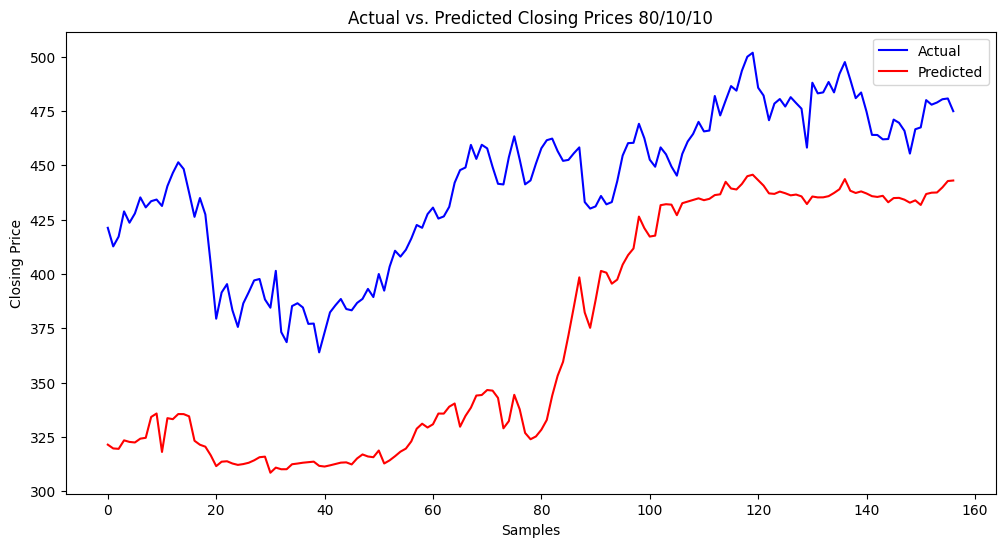

In [ ]:
import matplotlib.pyplot as plt
# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# LSTM

## LSTM 10 years

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get BP.L stock data for the past 10 years
data = yf.download('BP.L', start='2013-01-01', end='2023-01-01')
df = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Split the data into training and testing sets (80/20 split)
training_data_len = int(len(df) * 0.8)
train_data = df[0:training_data_len, :]
test_data = df[training_data_len:, :]

# Prepare the data for the LSTM
def prepare_data(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback - 1):
        X.append(data[i:(i + lookback), 0])
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)

lookback = 60  # Number of days to look back
X_train, y_train = prepare_data(train_data, lookback)
X_test, y_test = prepare_data(test_data, lookback)

# Reshape the data for the LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - loss: 0.1015 - mae: 0.2207 - mse: 0.1015
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0025 - mae: 0.0371 - mse: 0.0025
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0021 - mae: 0.0328 - mse: 0.0021
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0019 - mae: 0.0326 - mse: 0.0019
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0016 - mae: 0.0301 - mse: 0.0016
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0019 - mae: 0.0310 - mse: 0.0019
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - loss: 0.0019 - mae: 0.0331 - mse: 0.0019
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0016 - mae: 0.0295 - mse: 0.0016
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0013 - mae: 0.0267 - mse: 0.0013
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0015 - mae: 0.0272 - mse: 0.0015
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss:

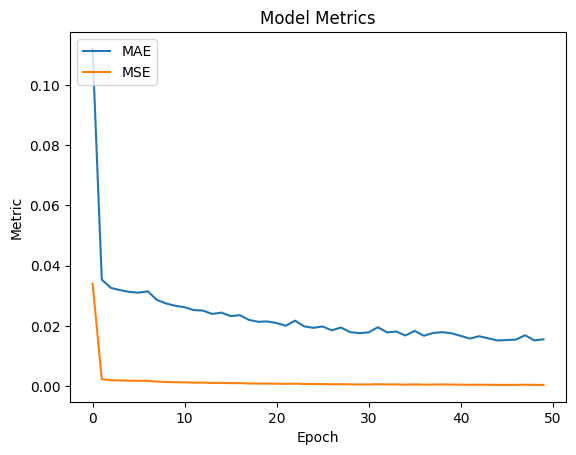

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test[0], predictions[:, 0]))
mse = mean_squared_error(y_test[0], predictions[:, 0])
mae = mean_absolute_error(y_test[0], predictions[:, 0])
r2 = r2_score(y_test[0], predictions[:, 0])

print('RMSE:', rmse)
print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

# Plot training metrics within epochs
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('Model Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

## lstm 5 years

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get BP.L stock data for the past 5 years
data = yf.download('BP.L', start='2018-01-01', end='2023-01-01')
df = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Split the data into training and testing sets (80/20 split)
training_data_len = int(len(df) * 0.8)
train_data = df[0:training_data_len, :]
test_data = df[training_data_len:, :]

# Prepare the data for the LSTM
def prepare_data(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback - 1):
        X.append(data[i:(i + lookback), 0])
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)

lookback = 60  # Number of days to look back
X_train, y_train = prepare_data(train_data, lookback)
X_test, y_test = prepare_data(test_data, lookback)

# Reshape the data for the LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.1029 - mae: 0.2355 - mse: 0.1029
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0055 - mae: 0.0596 - mse: 0.0055
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 0.0026 - mae: 0.0338 - mse: 0.0026
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0021 - mae: 0.0338 - mse: 0.0021
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0025 - mae: 0.0347 - mse: 0.0025
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0020 - mae: 0.0326 - mse: 0.0020
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0021 - mae: 0.0316 - mse: 0.0021
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 0.0024 - mae: 0.0333 - mse: 0.0024
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.0018 - mae: 0.0304 - mse: 0.0018
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0015 - mae: 0.0285 - mse: 0.0015
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0015 - 

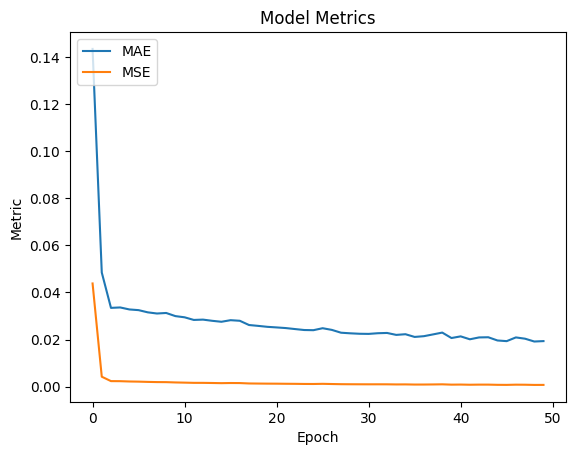

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test[0], predictions[:, 0]))
mse = mean_squared_error(y_test[0], predictions[:, 0])
mae = mean_absolute_error(y_test[0], predictions[:, 0])
r2 = r2_score(y_test[0], predictions[:, 0])

print('RMSE:', rmse)
print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

# Plot training metrics within epochs
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('Model Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

## LSTM feature Engineering

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download historical data for BP.L (7 years)
start_date = '2016-01-01'
end_date = '2023-01-01'
df = yf.download('BP.L', start=start_date, end=end_date)

# Feature Engineering
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()
delta = df['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))
# Lagged Close Prices
for i in range(1, 6):
    df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

# Drop NaN values resulting
df.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Define features and target
features = ['Close', 'SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']
target = 'Close'

# Extract features and target
data = df[features].values
target_data = df[target].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
target_scaler = MinMaxScaler()
scaled_target = target_scaler.fit_transform(target_data)

# Split the data into training, validation, and test sets (70/15/15 split)
X_train, X_temp, y_train, y_temp = train_test_split(scaled_data, scaled_target, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# Create sequences for LSTM
seq_length = 7
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(X_train, y_train, seq_length)
X_val, y_val = create_sequences(X_val, y_val, seq_length)
X_test, y_test = create_sequences(X_test, y_test, seq_length)

In [ ]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, len(features))))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Make predictions
predictions = model.predict(X_test)
predictions = target_scaler.inverse_transform(predictions)
y_test = target_scaler.inverse_transform(y_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0705 - mae: 0.2034 - mse: 0.0705 - val_loss: 0.0041 - val_mae: 0.0575 - val_mse: 0.0041
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0037 - mae: 0.0469 - mse: 0.0037 - val_loss: 0.0010 - val_mae: 0.0254 - val_mse: 0.0010
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0024 - mae: 0.0348 - mse: 0.0024 - val_loss: 0.0011 - val_mae: 0.0255 - val_mse: 0.0011
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0019 - mae: 0.0303 - mse: 0.0019 - val_loss: 0.0010 - val_mae: 0.0250 - val_mse: 0.0010
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0017 - mae: 0.0290 - mse: 0.0017 - val_loss: 9.8490e-04 - val_mae: 0.0245 - val_mse: 9.8490e-04
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0016 - mae: 0.0289 - mse: 0.0016 - val_loss: 9.9994e-04 - val_mae: 0.0246 - val_mse: 9.9994e-04
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0016 - mae: 0.0284 - mse: 0.0

RMSE: 11.90829250908639
MSE: 141.80743048196302
MAE: 9.823708517509596
R-squared: 0.9083266731694106


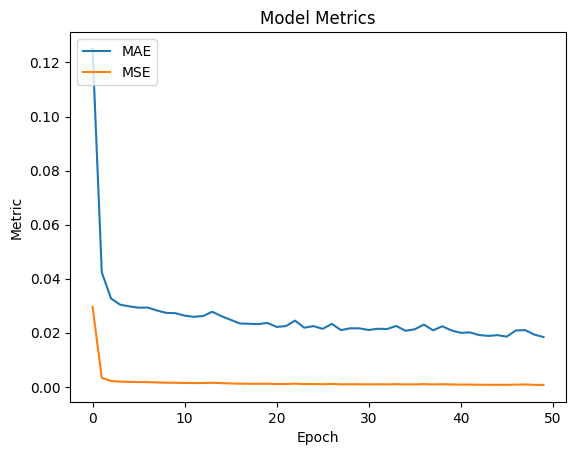

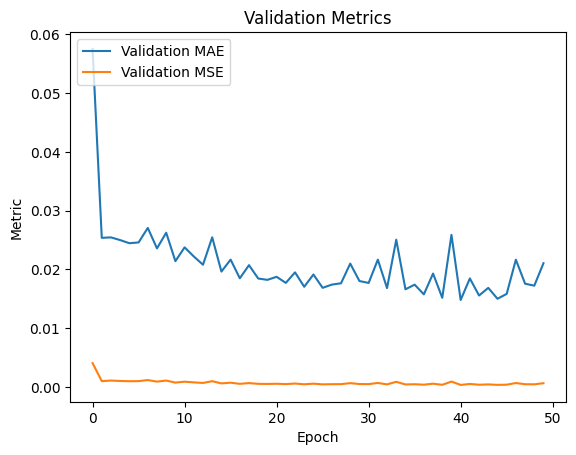

In [ ]:
print('RMSE:', rmse)
print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

# Plot training metrics
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('Model Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

# Plot validation metrics
plt.plot(history.history['val_mae'])
plt.plot(history.history['val_mse'])
plt.title('Validation Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['Validation MAE', 'Validation MSE'], loc='upper left')
plt.show()

## lstm  hyperparameter

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Download historical data for BP.L
df = yf.download('BP.L', start='2016-01-01', end='2023-01-01')

# Prepare data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 7
X, y = create_sequences(scaled_data, seq_length)

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.1765, random_state=42)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Models
model1 = Sequential()
model1.add(LSTM(64, activation='relu', input_shape=(seq_length, 1)))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')

model2 = Sequential()
model2.add(LSTM(64, activation='relu', input_shape=(seq_length, 1)))
model2.add(Dropout(0.25))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

model3 = Sequential()
model3.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(seq_length, 1)))
model3.add(LSTM(32, activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train models
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Function to evaluate model with additional metrics
def evaluate_model(model, X_test, y_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)

    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return rmse, mae, mse, r2

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2643 - val_loss: 0.0069
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - val_loss: 0.0025
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.8386e-04 - val_loss: 0.0012
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7366e-04 - val_loss: 0.0012
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.9895e-04 - val_loss: 0.0011
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.9776e-04 - val_loss: 0.0011
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.2002e-04 - val_loss: 0.0011
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.2173e-04 - val_loss: 0.0011
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.1554e-04 - val_loss: 0.0010
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms

In [ ]:
# Evaluate models on the test set
rmse1, mae1, mse1, r2_1 = evaluate_model(model1, X_test, y_test, scaler)
rmse2, mae2, mse2, r2_2 = evaluate_model(model2, X_test, y_test, scaler)
rmse3, mae3, mse3, r2_3 = evaluate_model(model3, X_test, y_test, scaler)

# Print evaluation metrics
print("Model 1 (Basic LSTM) - RMSE:", rmse1, "MAE:", mae1, "MSE:", mse1, "R^2:", r2_1)
print("Model 2 (LSTM with Dropout) - RMSE:", rmse2, "MAE:", mae2, "MSE:", mse2, "R^2:", r2_2)
print("Model 3 (Deeper LSTM) - RMSE:", rmse3, "MAE:", mae3, "MSE:", mse3, "R^2:", r2_3)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Model 1 (Basic LSTM) - RMSE: 8.596442015855079 MAE: 6.721387400771633 MSE: 73.89881533195852 R^2: 0.9918247886441927
Model 2 (LSTM with Dropout) - RMSE: 47.16795679801802 MAE: 42.376178336865976 MSE: 2224.8161484996945 R^2: 0.7538750498219078
Model 3 (Deeper LSTM) - RMSE: 31.26256991198058 MAE: 26.599661220203746 MSE: 977.3482775014735 R^2: 0.891878798044095


## LSTM Combine 1

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/LSTM1_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import keras_tuner as kt
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, Flatten

# Download historical data for BP.L
df = yf.download('BP.L', start='2016-01-01', end='2023-01-01')

# Feature Engineering
def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)
    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

# Prepare data
X = df[['SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']].values
y = df['Close'].values

# Standardise features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape data for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

[*********************100%***********************]  1 of 1 completed


In [ ]:
def build_model(hp):
    model = Sequential()

    # Add LSTM layers
    for i in range(hp.Int('num_layers', 1, 3)):
        activation = hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])
        model.add(LSTM(units=hp.Int('units', min_value=50, max_value=150, step=10),
                       activation=activation,
                       return_sequences=(i != hp.Int('num_layers', 1, 4) - 1)))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    # Add Flatten layer
    model.add(Flatten())

    # Add Dense layer with linear activation
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='LSTM1_Stock_Prediction'
    )

    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                 callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, LSTM_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, LSTM_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, LSTM_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

Trial 10 Complete [00h 00m 38s]
val_loss: 23076.142578125

Best val_loss So Far: 38.71577453613281
Total elapsed time: 00h 06m 11s
Best Hyperparameters:
Number of Layers: 3
units: 150
Dropout Rate: 0.4
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 7584.7510 - mean_absolute_error: 67.7803 - mean_squared_error: 7584.7510 - val_loss: 172.9926 - val_mean_absolute_error: 11.4721 - val_mean_squared_error: 172.9926
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4370.5288 - mean_absolute_error: 51.7671 - mean_squared_error: 4370.5288 - val_loss: 215.9563 - val_mean_absolute_error: 13.2236 - val_mean_squared_error: 215.9563
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5152.3716 - mean_absolute_error: 54.8002 - mean_squared_error: 5152.3716 - val_loss: 169.8313 - val_mean_absolute_error: 11.7208 - val_mean_squared_error: 169.8313
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4943.1284 - mean_absolute_error: 55.5061 - mean_squared_error: 4943.1284 - val_loss: 104.4201 - val_mean_absolute_error: 8.7495 - val_mean_squared_error: 104.4201
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4821.4209 - mean_absolute_error: 55.8642 - mean_squared_error

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 4557.3418 - mean_absolute_error: 53.6075 - mean_squared_error: 4557.3418 - val_loss: 306.6198 - val_mean_absolute_error: 15.6462 - val_mean_squared_error: 306.6198
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4323.5801 - mean_absolute_error: 50.7924 - mean_squared_error: 4323.5801 - val_loss: 2045.2953 - val_mean_absolute_error: 44.2992 - val_mean_squared_error: 2045.2953
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 4671.0376 - mean_absolute_error: 53.1315 - mean_squared_error: 4671.0376 - val_loss: 302.0457 - val_mean_absolute_error: 15.3903 - val_mean_squared_error: 302.0457
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4641.9678 - mean_absolute_error: 52.7353 - mean_squared_error: 4641.9678 - val_loss: 333.4800 - val_mean_absolute_error: 16.4034 - val_mean_squared_error: 333.4800
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4642.5425 - mean_absolute_error: 53.0504 - mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 10438.0273 - mean_absolute_error: 82.8603 - mean_squared_error: 10438.0273 - val_loss: 48.0681 - val_mean_absolute_error: 5.5422 - val_mean_squared_error: 48.0681
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5600.5396 - mean_absolute_error: 60.2764 - mean_squared_error: 5600.5396 - val_loss: 45.6580 - val_mean_absolute_error: 5.3710 - val_mean_squared_error: 45.6580
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5399.9351 - mean_absolute_error: 57.8581 - mean_squared_error: 5399.9351 - val_loss: 45.1858 - val_mean_absolute_error: 5.3142 - val_mean_squared_error: 45.1858
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5149.0752 - mean_absolute_error: 57.6960 - mean_squared_error: 5149.0752 - val_loss: 415.6829 - val_mean_absolute_error: 18.7070 - val_mean_squared_error: 415.6829
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5588.1260 - mean_absolute_error: 60.7211 - mean_squared_error: 558

Metrics for the 70/15/15 split: MSE: 1524.9357995916237, RMSE: 39.05042636888391, MAE: 38.00888022564827, R²: 0.01795193165218245
Metrics for the 80/10/10 split: MSE: 357.3421149234863, RMSE: 18.903494780687677, MAE: 16.93673220105991, R²: 0.7072135132187147
Metrics for the 60/20/20 split: MSE: 922.6854812771368, RMSE: 30.375738365958064, MAE: 29.04809882313299, R²: 0.5938460552941858


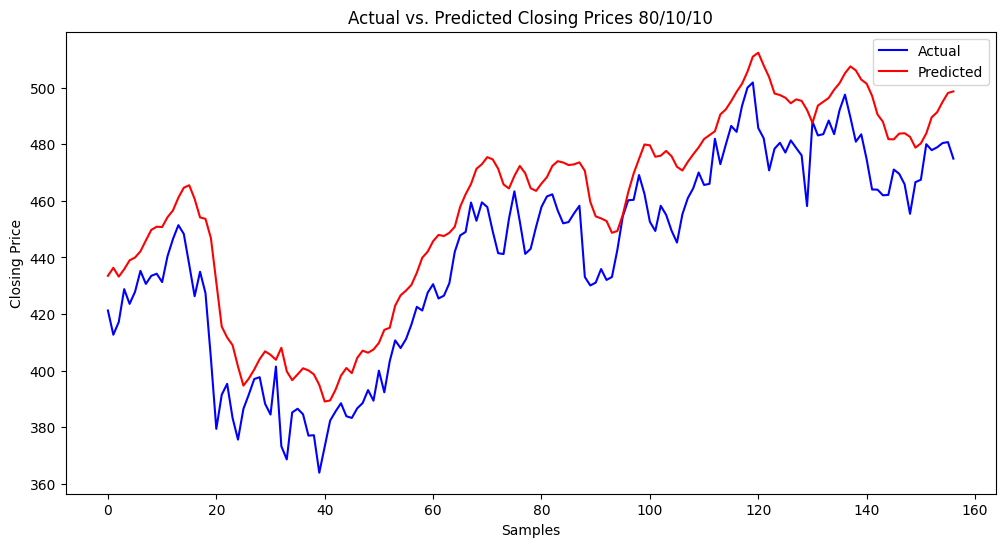

In [ ]:
# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## LSTM Combine 2

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/LSTM2_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import keras_tuner as kt
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, Flatten

# Download historical data for BP.L
df = yf.download('BP.L', start='2016-01-01', end='2023-01-01')

# Feature Engineering
def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)
    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

# Prepare data
X = df[['SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']].values
y = df['Close'].values

# Standardise features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape data for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

[*********************100%***********************]  1 of 1 completed


In [ ]:
def build_model(hp):
    model = Sequential()

    # Add LSTM layers
    for i in range(hp.Int('num_layers', 1, 4)):
        activation = hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])
        model.add(LSTM(units=hp.Int('units', min_value=50, max_value=150, step=10),
                       activation=activation,
                       return_sequences=(i != hp.Int('num_layers', 1, 4) - 1)))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    # Add Flatten layer
    model.add(Flatten())

    # Add Dense layer with linear activation
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='LSTM2_Stock_Prediction'
    )

    # Perform hyperparameter tuning
    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                 callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"Units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                   callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, LSTM_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, LSTM_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, LSTM_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

Trial 10 Complete [00h 00m 20s]
val_loss: 245.48843383789062

Best val_loss So Far: 41.194664001464844
Total elapsed time: 00h 05m 33s
Best Hyperparameters:
Number of Layers: 4
Units: 120
Dropout Rate: 0.5
Learning Rate: 0.001
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 7771.2725 - mean_absolute_error: 70.0885 - mean_squared_error: 7771.2725 - val_loss: 41.9797 - val_mean_absolute_error: 5.1431 - val_mean_squared_error: 41.9797
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7749.6616 - mean_absolute_error: 69.1670 - mean_squared_error: 7749.6616 - val_loss: 121.9996 - val_mean_absolute_error: 9.5486 - val_mean_squared_error: 121.9996
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6495.7485 - mean_absolute_error: 63.0638 - mean_squared_error: 6495.7485 - val_loss: 38.0957 - val_mean_absolute_error: 4.9477 - val_mean_squared_error: 38.0957
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7121.0767 - mean_absolute_error: 67.9035 - mean_squared_error: 7121.0767 - val_loss: 372.5224 - val_mean_absolute_error: 18.1580 - val_mean_squared_error: 372.5224
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7507.6499 - mean_absolute_error: 68.9053 - mean_squared_error: 7507

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 6993.0420 - mean_absolute_error: 65.5390 - mean_squared_error: 6993.0420 - val_loss: 156.1390 - val_mean_absolute_error: 10.0004 - val_mean_squared_error: 156.1390
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7235.0083 - mean_absolute_error: 67.3517 - mean_squared_error: 7235.0083 - val_loss: 147.5055 - val_mean_absolute_error: 9.6081 - val_mean_squared_error: 147.5055
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6802.1621 - mean_absolute_error: 64.9341 - mean_squared_error: 6802.1621 - val_loss: 84.5911 - val_mean_absolute_error: 7.0309 - val_mean_squared_error: 84.5911
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6570.9487 - mean_absolute_error: 62.5403 - mean_squared_error: 6570.9487 - val_loss: 107.6855 - val_mean_absolute_error: 8.0872 - val_mean_squared_error: 107.6855
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7154.7368 - mean_absolute_error: 66.0334 - mean_squared_error: 71

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 8266.3125 - mean_absolute_error: 71.5652 - mean_squared_error: 8266.3125 - val_loss: 484.6208 - val_mean_absolute_error: 19.5485 - val_mean_squared_error: 484.6208
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 8103.3555 - mean_absolute_error: 72.8342 - mean_squared_error: 8103.3555 - val_loss: 207.3823 - val_mean_absolute_error: 11.2547 - val_mean_squared_error: 207.3823
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7931.5483 - mean_absolute_error: 69.0861 - mean_squared_error: 7931.5483 - val_loss: 137.5771 - val_mean_absolute_error: 9.0672 - val_mean_squared_error: 137.5771
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 7890.9370 - mean_absolute_error: 72.0739 - mean_squared_error: 7890.9370 - val_loss: 353.4762 - val_mean_absolute_error: 16.2838 - val_mean_squared_error: 353.4762
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 7751.7124 - mean_absolute_error: 69.0605 - mean_squared_error

Metrics for the 70/15/15 split: MSE: 292.08991018398564, RMSE: 17.090638085922528, MAE: 14.469756560629987, R²: 0.8118961256225424
Metrics for the 80/10/10 split: MSE: 240.70828147606247, RMSE: 15.514776230292929, MAE: 13.14786485805633, R²: 0.8027768652804125
Metrics for the 60/20/20 split: MSE: 107.7897763936468, RMSE: 10.382185530688941, MAE: 8.204543141130442, R²: 0.9525523661425341


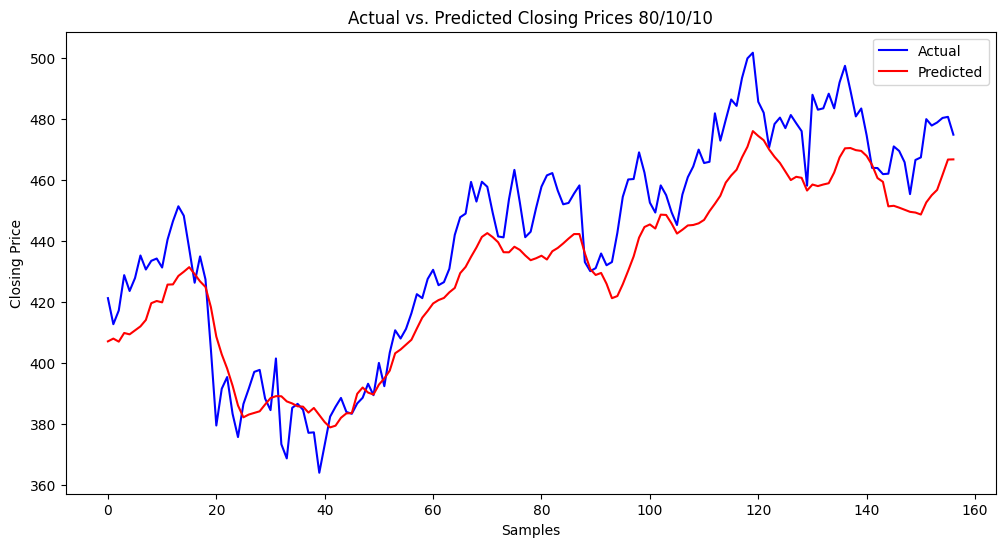

In [ ]:
# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## LSTM Combine 3

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/LSTM3_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download historical data for BP.L
df = yf.download('BP.L', start='2016-01-01', end='2023-01-01')

# Function for feature engineering
def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    df['MACD'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['Bollinger_High'] = df['SMA_50'] + (df['Close'].rolling(window=50).std() * 2)
    df['Bollinger_Low'] = df['SMA_50'] - (df['Close'].rolling(window=50).std() * 2)
    df['Volatility'] = df['Close'].pct_change().rolling(window=20).std()
    df['Day'] = df.index.day
    df['Month'] = df.index.month
    df['Year'] = df.index.year

    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

# RSI computation function
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))


# Apply feature engineering
df = feature_engineering(df)

# Select features and target
feature_columns = [
    'SMA_50', 'SMA_200', 'RSI', 'MACD',
    'Bollinger_High', 'Bollinger_Low',
    'Volatility', 'Day', 'Month', 'Year',
    'Close_Lagged_1', 'Close_Lagged_2',
    'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5'
]
X = df[feature_columns].values
y = df['Close'].values

# Use MinMaxScaler to scale features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape data for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

[*********************100%***********************]  1 of 1 completed


In [ ]:
def build_model(hp):
    model = Sequential()

    # Add LSTM layers
    for i in range(hp.Int('num_layers', 1, 4)):
        activation = hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])
        model.add(LSTM(units=hp.Int('units', min_value=50, max_value=150, step=10),
                       activation=activation,
                       return_sequences=(i != hp.Int('num_layers', 1, 4) - 1)))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    # Add Flatten layer
    model.add(Flatten())

    # Add Dense layer with linear activation
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='LSTM3_Stock_Prediction'
    )


    # Perform hyperparameter tuning
    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),  callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, LSTM_3_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, LSTM_3_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, LSTM_3_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Trial 10 Complete [00h 00m 25s]
val_loss: 691.2884521484375

Best val_loss So Far: 37.95412063598633
Total elapsed time: 00h 05m 13s
Best Hyperparameters:
Number of Layers: 2
units: 100
Dropout Rate: 0.5
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 6428.2065 - mean_absolute_error: 64.3228 - mean_squared_error: 6428.2065 - val_loss: 65.2655 - val_mean_absolute_error: 6.4770 - val_mean_squared_error: 65.2655
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6757.5200 - mean_absolute_error: 65.4091 - mean_squared_error: 6757.5200 - val_loss: 38.2760 - val_mean_absolute_error: 4.8573 - val_mean_squared_error: 38.2760
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7089.2173 - mean_absolute_error: 66.4668 - mean_squared_error: 7089.2173 - val_loss: 62.9950 - val_mean_absolute_error: 6.4977 - val_mean_squared_error: 62.9950
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6868.4795 - mean_absolute_error: 64.8567 - mean_squared_error: 6868.4795 - val_loss: 56.2656 - val_mean_absolute_error: 6.0263 - val_mean_squared_error: 56.2656
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6901.5137 - mean_absolute_error: 64.1606 - mean_squared_error: 6901.5137 -

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 7085.8438 - mean_absolute_error: 66.5510 - mean_squared_error: 7085.8438 - val_loss: 781.0436 - val_mean_absolute_error: 26.6986 - val_mean_squared_error: 781.0436
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6521.0835 - mean_absolute_error: 62.5879 - mean_squared_error: 6521.0835 - val_loss: 115.0936 - val_mean_absolute_error: 8.5404 - val_mean_squared_error: 115.0936
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6271.5581 - mean_absolute_error: 61.6869 - mean_squared_error: 6271.5581 - val_loss: 329.8246 - val_mean_absolute_error: 16.2519 - val_mean_squared_error: 329.8246
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6435.5874 - mean_absolute_error: 62.2605 - mean_squared_error: 6435.5874 - val_loss: 199.8920 - val_mean_absolute_error: 12.3479 - val_mean_squared_error: 199.8920
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5832.7876 - mean_absolute_error: 60.2549 - mean_squared_error: 58

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 8186.0171 - mean_absolute_error: 72.5913 - mean_squared_error: 8186.0171 - val_loss: 107.4844 - val_mean_absolute_error: 8.4739 - val_mean_squared_error: 107.4844
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7041.4492 - mean_absolute_error: 68.0951 - mean_squared_error: 7041.4492 - val_loss: 128.4710 - val_mean_absolute_error: 8.9538 - val_mean_squared_error: 128.4710
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7677.5654 - mean_absolute_error: 70.1804 - mean_squared_error: 7677.5654 - val_loss: 160.0010 - val_mean_absolute_error: 10.5741 - val_mean_squared_error: 160.0010
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8257.3623 - mean_absolute_error: 70.9796 - mean_squared_error: 8257.3623 - val_loss: 119.6126 - val_mean_absolute_error: 9.1037 - val_mean_squared_error: 119.6126
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7414.2988 - mean_absolute_error: 68.2923 - mean_squared_error: 741

In [ ]:
LSTM_3_model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 100)              │          46,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 380,705 (1.45 MB)

 Trainable params: 126,901 (495.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 253,804 (991.43 KB)

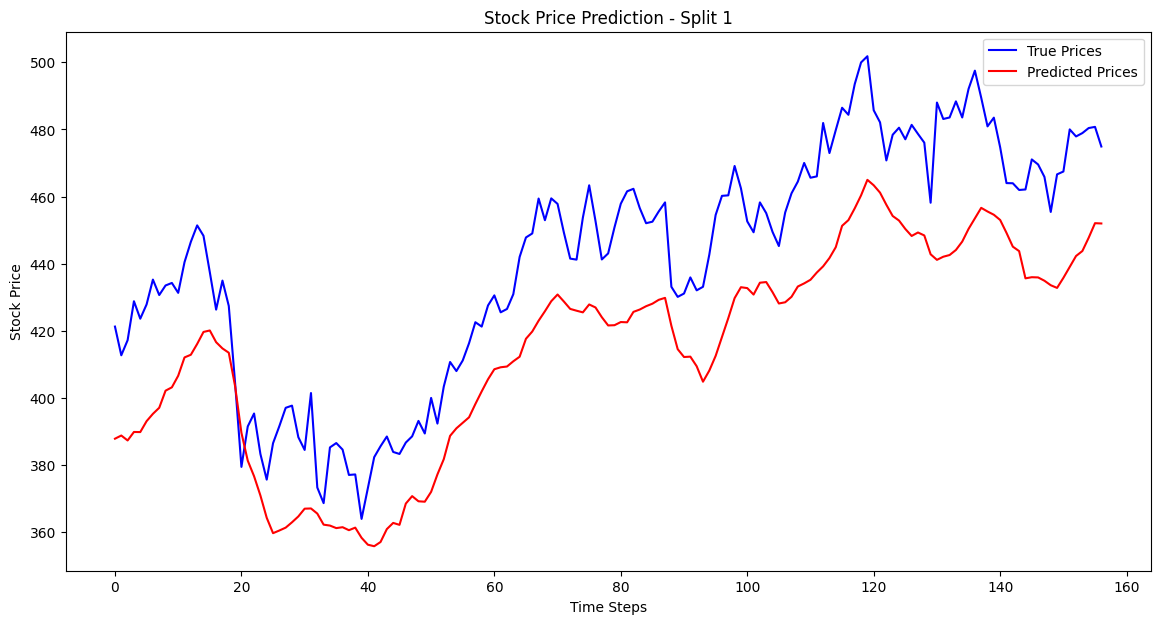

Split 1: MSE: 777.6330054581201, RMSE: 27.886071890069424, MAE: 26.414344155864352, R²: 0.36285025983571595


In [ ]:
# Plotting True vs Predicted Prices
import matplotlib.pyplot as plt
# Plot predictions for the first split
plt.figure(figsize=(14, 7))
plt.plot(y_test_2, label='True Prices', color='blue')
plt.plot(y_pred_2, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction - Split 1')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the results
print(f"Split 1: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}")